In [ ]:
# Carga de  librerías

# Importar las librerías básicas
# Libreria para manipulación y análisis de datos
import pandas as pd
# Libreria para operaciones numéricas
import numpy as np
# Libreria para trabajar con rutas de archivos
from pathlib import Path
# Libreria para crear visualizaciones
import matplotlib.pyplot as plt
# Libreria para crear visualizaciones estadísticas
import seaborn as sns

# Importar los módulos necesarios para el entrenamiento y evaluación del modelo
# Libreria para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Libreria para escalar y codificar datos
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Libreria para construir un modelo clasificador Random Forest
from sklearn.ensemble import RandomForestClassifier
# Libreria para evaluar el rendimiento del modelo
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
# Librería para construir un modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
# Librería para validación cruzada
from sklearn.model_selection import cross_val_score
# Librería para Support Vector Clasiffier
from sklearn.svm import SVC
# Librería para construir modelos K-Nearest Neighbors para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Librería para construir modelos Random Forest que está basado en árbles de decisión.
from sklearn.ensemble import RandomForestClassifier
# Librería para optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV

In [301]:
# Rutas
# Define el directorio para los datos limpios
#DATA_DIR = Path(r"C:\Users\chile\projects\proy_insurance\data\clean_data")
DATA_DIR = Path(r"./clean_data")
# Define la ruta al archivo CSV limpio
CSV_IN   = DATA_DIR / "coil2000_clean.csv"
# Define el directorio para guardar las gráficas
PLOTS_DIR = DATA_DIR / "eda_plots"
# Crea el directorio de gráficas si no existe
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

# Define una lista de columnas categóricas
CAT_COLS = ["MOSTYPE", "MOSHOOFD", "MKOOPKLA"]

In [302]:
# Importar el archivo csv procesados previamente
df_clean = pd.read_csv(DATA_DIR / "coil2000_clean.csv")

# Imprimir la forma del DataFrame
print("Forma:", df_clean.shape)
# Imprimir los nombres de las columnas
print("Columnas:", df_clean.columns[:])
# Con el propósito de identificar outliers, se eliminarán las variables categóricas que fueron limpiadas previamente.
# Crear un nuevo DataFrame eliminando las columnas categóricas
df_sin_cat = df_clean.drop(columns=CAT_COLS, errors="ignore")

Forma: (624, 86)
Columnas: Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
 

In [303]:
# Contar el número de clientes en cada clase de la variable objetivo 'CARAVAN'
# Normalizar los conteos para obtener porcentajes y redondear a 2 decimales
(df_clean["CARAVAN"].value_counts(normalize=True) * 100).round(2)

,proportion
CARAVAN,
0.0,92.95
1.0,7.05


In [304]:
# Análisis de los valores extremos de cada variable
# Imprimir las estadísticas descriptivas para las columnas numéricas, redondeadas a 2 decimales
print(round(df_sin_cat.describe(),2))    # variables numéricas

       MAANTHUI  MGEMOMV  MGEMLEEF  MGODRK  MGODPR  MGODOV  MGODGE  MRELGE  \
count    624.00   624.00    624.00  624.00  624.00  624.00  624.00  624.00   
mean       1.13     2.60      3.00    0.75    8.98    3.52    4.71   11.21   
std        0.37     0.81      0.88    1.00   52.08   37.92   34.25   54.53   
min        1.00     1.00      1.00    0.00    0.00    0.00    0.00    0.00   
25%        1.00     2.00      2.00    0.00    4.00    0.00    2.00    5.00   
50%        1.00     3.00      3.00    0.00    5.00    1.00    3.00    6.00   
75%        1.00     3.00      3.00    1.00    5.00    2.00    4.00    7.00   
max        3.00     5.00      6.00    7.00  949.00  751.00  858.00  887.00   

       MRELSA  MRELOV  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  \
count  624.00  624.00  ...    624.00   624.00   624.00  624.00   624.00   
mean     4.46    6.32  ...      0.98     2.82     1.86    2.84     1.68   
std     38.17   49.35  ...     14.63    41.87    38.64   28.09    28.57 

In [305]:
# Función para definir los límites y determinar outliers

def detect_outliers_iqr(df, cols=None, k=1.5, exclude=None):
    """
    Detecta outliers utilizando el método del Rango Intercuartílico (IQR).

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        cols (list, optional): Una lista de columnas para buscar outliers.
                                Si es None, se utilizan todas las columnas numéricas excepto las de 'exclude'.
                                Por defecto es None.
        k (float, optional): El multiplicador del IQR para determinar los límites. Por defecto es 1.5.
        exclude (list, optional): Una lista de columnas a excluir de la detección de outliers.
                                Por defecto es None.

    Returns:
        tuple: Una tupla que contiene:
            - bounds (pd.DataFrame): DataFrame con Q1, Q3, IQR, límites inferiores y superiores,
                                     y ratios de valores extremos para cada columna.
            - outliers_long (pd.DataFrame): DataFrame con detalles de cada outlier (índice, columna, valor, límites).
            - counts (pd.Series): Series con el conteo de outliers para cada columna, ordenado descendentemente.
    """
    exclude = exclude or []
    # Seleccionar columnas numéricas y excluir las columnas especificadas
    cols = cols or df.select_dtypes(include="number").columns.difference(exclude).tolist()

    # Calcular el primer cuartil (Q1), tercer cuartil (Q3) y el Rango Intercuartílico (IQR)
    q1, q3 = df[cols].quantile(0.25), df[cols].quantile(0.75)
    iqr = q3 - q1
    # Calcular los límites inferior y superior para la detección de outliers
    lower, upper = q1 - k*iqr, q3 + k*iqr

    # Calcular los ratios de valores extremos (max/Q3 y min/Q1)
    with np.errstate(divide="ignore", invalid="ignore"):
        extrem_max = round(df[cols].max() / q3.replace(0, np.nan),2)
        extrem_min = round(df[cols].min() / q1.replace(0, np.nan),2)

    # Crear un DataFrame para almacenar los límites calculados y los ratios extremos
    bounds = pd.DataFrame({"Q1": q1, "Q3": q3, "IQR": iqr,
                           "lower": lower, "upper": upper,
                           "extrem_min": extrem_min,"extrem_max": extrem_max})

    print(bounds.columns)

    # Identificar outliers para cada columna
    parts = []
    for c in cols:
        s = df[c]
        # Verificar si los valores están fuera de rango ya sea límite inferior o superior
        m = (s < lower[c]) | (s > upper[c])
        if m.any():
            # Almacenar detalles de los outliers en un DataFrame
            parts.append(pd.DataFrame({
                "index": s.index[m],
                "col": c,
                "value": s[m].values,
                "lower": lower[c],
                "upper": upper[c],
                "extrem_min": extrem_min[c],
                "extrem_max": extrem_max[c],
            }))

    # Concatenar los detalles de los outliers de todas las columnas
    outliers_long = (pd.concat(parts, ignore_index=True)
                     if parts else pd.DataFrame(columns=["index","col","value","lower","upper","extrem_min","extrem_max"]))
    # Contar el número de outliers por columna y ordenar en orden descendente
    counts = outliers_long["col"].value_counts().rename("n_outliers").sort_values(ascending=False)
    return bounds, outliers_long, counts

In [306]:
# Mostrar variables con la mayor cantidad de outliers
# Llamar a la función detect_outliers_iqr para obtener límites, detalles de outliers y conteos
umbrales, outliers, cuenta_out = detect_outliers_iqr(df_sin_cat, cols=None, k=1.5, exclude=None)
# Filtrar los límites para incluir solo filas donde 'extrem_max' no es NaN
umbrales_no_nan = umbrales[umbrales["extrem_max"].notna()].copy()
# Imprimir los límites filtrados
print(umbrales_no_nan)

Index(['Q1', 'Q3', 'IQR', 'lower', 'upper', 'extrem_min', 'extrem_max'], dtype='object')
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MAANTHUI  1.0  1.0  0.0    1.0    1.0         1.0        3.00
MGEMOMV   2.0  3.0  1.0    0.5    4.5         0.5        1.67
MGEMLEEF  2.0  3.0  1.0    0.5    4.5         0.5        2.00
MGODRK    0.0  1.0  1.0   -1.5    2.5         NaN        7.00
MGODPR    4.0  5.0  1.0    2.5    6.5         0.0      189.80
MGODOV    0.0  2.0  2.0   -3.0    5.0         NaN      375.50
MGODGE    2.0  4.0  2.0   -1.0    7.0         0.0      214.50
MRELGE    5.0  7.0  2.0    2.0   10.0         0.0      126.71
MRELSA    0.0  2.0  2.0   -3.0    5.0         NaN      334.00
MRELOV    1.0  3.0  2.0   -2.0    6.0         0.0      303.67
MFALLEEN  0.0  3.0  3.0   -4.5    7.5         NaN      292.67
MFGEKIND  2.0  4.0  2.0   -1.0    7.0         0.0      228.00
MFWEKIND  3.0  6.0  3.0   -1.5   10.5         0.0      119.83
MOPLHOOG  0.0  2.0  2.0   -3.0    5.0      

In [307]:
# Determinar las variables para las cuales NO se eliminarán los outliers
# Imprimir las estadísticas descriptivas para la columna 'extrem_max', redondeadas a 2 decimales
print(round(umbrales_no_nan['extrem_max'].describe(),2))

#umbrales_no_nan.extrem_max.plot(kind = "hist",bins=100)

# Calcular el percentil 15 de 'extrem_max'
p_select = round(umbrales_no_nan["extrem_max"].quantile(0.15),2)
# Imprimir el valor del percentil 15
print('Valor de percentil 15% = ',p_select,'\n')
#umbrales_no_nan.loc[umbrales_no_nan["extrem_max"] <= p_select, "extrem_max"].plot(kind="hist", bins=100)

# Filtrar variables donde 'extrem_max' es menor o igual al percentil 15
v_no_delet_out = umbrales_no_nan.loc[umbrales_no_nan["extrem_max"] <= p_select]
# Obtener el índice (nombres de variables) de estas variables filtradas como una lista
v_lista_mantener= (
    umbrales_no_nan
      .loc[umbrales_no_nan["extrem_max"] <= p_select]
      .index
      .tolist()
)

# Imprimir las variables para las cuales NO se eliminarán los outliers (DataFrame y lista)
print(f'Variables a las que NO se les eliminaran los outliers \n',v_no_delet_out, '\n')
print(f'Variables a las que NO se les eliminaran los outliers \n',v_lista_mantener, '\n')

count       45.00
mean       895.17
std       4251.02
min          1.50
25%         98.00
50%        189.80
75%        303.67
max      28719.50
Name: extrem_max, dtype: float64
Valor de percentil 15% =  75.2 

Variables a las que NO se les eliminaran los outliers 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MAANTHUI  1.0  1.0  0.0    1.0    1.0         1.0        3.00
MGEMOMV   2.0  3.0  1.0    0.5    4.5         0.5        1.67
MGEMLEEF  2.0  3.0  1.0    0.5    4.5         0.5        2.00
MGODRK    0.0  1.0  1.0   -1.5    2.5         NaN        7.00
MSKA      0.0  2.0  2.0   -3.0    5.0         NaN       68.00
PWAPART   2.0  2.0  0.0    2.0    2.0         0.5        1.50
AWAPART   1.0  1.0  0.0    1.0    1.0         1.0       10.00 

Variables a las que NO se les eliminaran los outliers 
 ['MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MGODRK', 'MSKA', 'PWAPART', 'AWAPART'] 



In [308]:
# Función para explorar cómo se vería una variable sin outliers
def outlier_var(y_var, df, outliers_long = outliers, bounds = umbrales):
    # y_var puede ser una cadena o una lista/tupla
    # Convertir y_var a una lista si es una cadena
    cols = [y_var] if isinstance(y_var, str) else list(y_var)

    # Imprimir los límites de outliers para la(s) variable(s) especificada(s)
    print(f' ---> Límites Outliers {y_var} \n',bounds.loc[[y_var]],'\n')

    # Si outliers_long es None o está vacío, devolver una copia del DataFrame original
    if outliers_long is None or outliers_long.empty:
        return df.copy()

    # Obtener los índices de las filas con outliers en las columnas especificadas
    idx = outliers_long.loc[outliers_long['col'].isin(cols), 'index'].unique()

    # Devolver el DataFrame sin las filas que contienen outliers
    return df.drop(index=idx, errors="ignore").reset_index(drop=True)

In [309]:
# Función para graficar información sobre una variable específica
# Necesita declarar la variable objetivo y la covariable y
# También declarar las dimensiones de la cuadrícula: filas x columnas

def info_variable(x_target, y_var, tabla, filas, columnas):
    """
    Proporciona información y gráficas para una variable dada, con y sin outliers.

    Args:
        x_target (str): El nombre de la variable objetivo (ej. 'CARAVAN').
        y_var (str o list): El nombre de la variable a analizar.
        tabla (pd.DataFrame): El DataFrame de entrada.
        filas (int): Número de filas para la cuadrícula de la gráfica.
        columnas (int): Número de columnas para la cuadrícula de la gráfica.

    Returns:
        tuple: Una tupla que contiene:
            - tabla_ct (pd.DataFrame): Tabla de contingencia de la variable con el objetivo,
                                       incluyendo estadísticas descriptivas.
            - para_modelo (pd.Series): Series que indican si la variable debe ser
                                       considerada para el modelo basándose en el impacto de outliers
                                       y el cambio de rango.
    """

    # Obtener el DataFrame sin outliers para la variable especificada
    df_fnc = outlier_var(y_var, tabla, outliers_long = outliers, bounds = umbrales)

    #print(f' ---> Tendencia central {y_var} \n',round(tabla[y_var].describe(),2),'\n')
    #print(f' ---> Tendencia central {y_var} sin outliers \n',round(df_fnc[y_var].describe(),2),'\n')

    # métricas estadísticas a calcular
    #stats = ["count", "mean", "median", "std"]

    # Calcular estadísticas por clase objetivo (0 y 1) y combinar
    tabla_ct = (
    df_fnc.groupby(x_target)[y_var]
          .agg(count="count", mean="mean", median="median", std="std", min='min', max='max')
          .round(2)
          .reindex([0, 1])
        )

    # Calcular el porcentaje de la clase 1 en los datos filtrados
    pct_1 = round( 100*tabla_ct.loc[1, 'count']/(tabla_ct.loc[0, 'count']+ tabla_ct.loc[1, 'count']),2)
    # Calcular la diferencia relativa en la media entre las dos clases
    long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
    # Verificar si el rango de la clase 0 es mayor que 0
    long_media = (round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min']),2) >  0)
    # Calcular la relación del rango de la clase 0 con el rango de la clase 1
    dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)

    # Verificar si los rangos son similares y el rango de la clase 0 es positivo
    rango = (0.9 <dif_media < 1.10 and long_media== True)
    if rango == True:
        # El rango no cambia significativamente
        cambia_rango = "NO"
    else:
        # El rango cambia significativamente
        cambia_rango = "SI"


    # Verificar si la diferencia de la media entre clases es menor al 10%
    change_post_out = (long_mean < 0.1)
    if change_post_out == True:
        # No considerar para el modelo
        considerar= "NO"
    else:
        # Considerar para el modelo
        considerar = "SI"


    # Crear una Serie con indicadores para la variable
    indicador = pd.Series([y_var,long_media, long_mean, change_post_out, considerar,cambia_rango], index=["variable","long_media", "dif_mean", "dif<10%", "considerar","cambia_rango"])

    # Imprimir la tabla de contingencia y los indicadores
    print(tabla_ct,'\n')
    print(indicador, '\n')


    # Series para indicar si la variable debe ser considerada para el modelo
    #para_modelo = pd.Series([y_var, considerar,cambia_rango], index=['variable', 'considerar','cambia_rango'])
    para_modelo = pd.Series([y_var, considerar,cambia_rango])



# Gráficas
    # Crear una figura y ejes para las gráficas
    fig, axes = plt.subplots(filas, columnas, figsize=(9, 4))
    # Graficar un histograma de la variable sin outliers
    df_fnc[y_var].plot(kind="hist", bins=30, ax=axes[0])
    # Graficar un boxplot de la variable por clase objetivo, sin outliers
    sns.boxplot(x=x_target, y=y_var, data=df_fnc, ax=axes[1])

    # Ajustar el diseño y mostrar las gráficas
    plt.tight_layout(); plt.show()

    # Devolver la tabla de contingencia y la serie 'para_modelo'
    return tabla_ct, para_modelo

In [310]:
# Listar las variables para las cuales NO se eliminarán los outliers
# Combinar columnas categóricas, la lista de variables a mantener outliers y 'MBERBOER'
EXCLUDE_COLS =CAT_COLS + v_lista_mantener + ['MBERBOER']

# Imprimir la lista de variables excluidas de la eliminación de outliers
print('Variables que se excluyen de ELIMINACION DE outliers \n', EXCLUDE_COLS ,'\n')

Variables que se excluyen de ELIMINACION DE outliers 
 ['MOSTYPE', 'MOSHOOFD', 'MKOOPKLA', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MGODRK', 'MSKA', 'PWAPART', 'AWAPART', 'MBERBOER'] 




=== MGODPR ===
 ---> Límites Outliers MGODPR 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MGODPR  4.0  5.0  1.0    2.5    6.5         0.0       189.8 

         count  mean  median   std  min  max
CARAVAN                                     
0          441  4.51     5.0  0.92  3.0  6.0
1           33  4.48     4.0  0.87  3.0  6.0 

variable        MGODPR
long_media        True
dif_mean          0.01
dif<10%           True
considerar          NO
cambia_rango        NO
dtype: object 



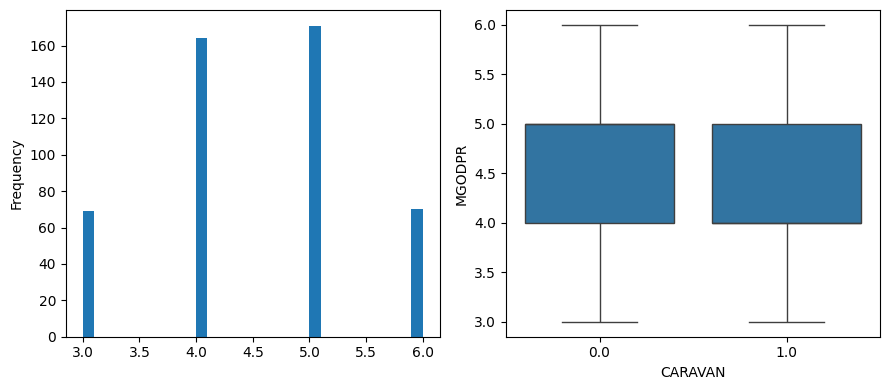

         count  mean  median   std  min  max
CARAVAN                                     
0          441  4.51     5.0  0.92  3.0  6.0
1           33  4.48     4.0  0.87  3.0  6.0 


=== MGODOV ===
 ---> Límites Outliers MGODOV 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MGODOV  0.0  2.0  2.0   -3.0    5.0         NaN       375.5 

         count  mean  median   std  min  max
CARAVAN                                     
0          577  1.05     1.0  1.07  0.0  5.0
1           43  1.07     1.0  0.88  0.0  3.0 

variable        MGODOV
long_media        True
dif_mean          0.02
dif<10%           True
considerar          NO
cambia_rango        SI
dtype: object 



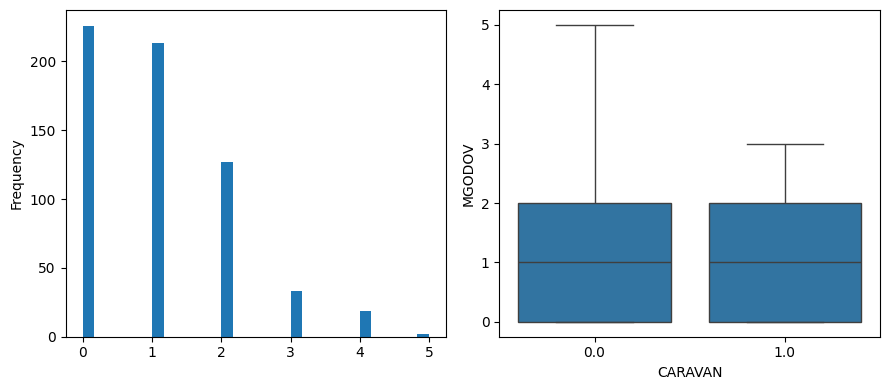

         count  mean  median   std  min  max
CARAVAN                                     
0          577  1.05     1.0  1.07  0.0  5.0
1           43  1.07     1.0  0.88  0.0  3.0 


=== MGODGE ===
 ---> Límites Outliers MGODGE 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MGODGE  2.0  4.0  2.0   -1.0    7.0         0.0       214.5 

         count  mean  median   std  min  max
CARAVAN                                     
0          577  3.36     3.0  1.64  0.0  7.0
1           44  2.80     3.0  1.49  0.0  5.0 

variable        MGODGE
long_media        True
dif_mean          0.17
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



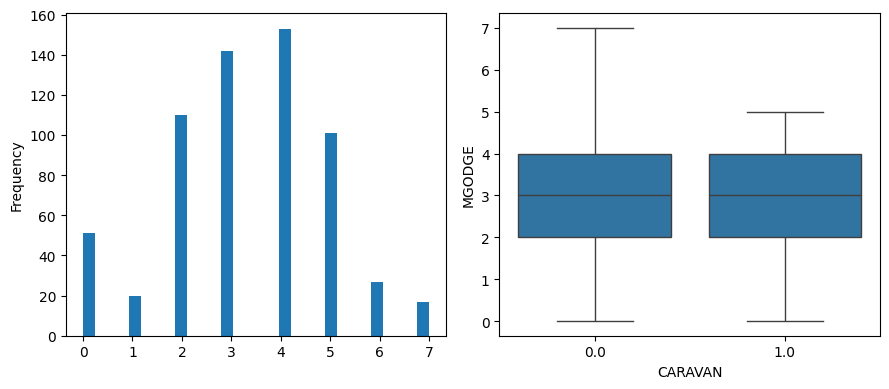

         count  mean  median   std  min  max
CARAVAN                                     
0          577  3.36     3.0  1.64  0.0  7.0
1           44  2.80     3.0  1.49  0.0  5.0 


=== MRELGE ===
 ---> Límites Outliers MRELGE 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MRELGE  5.0  7.0  2.0    2.0   10.0         0.0      126.71 

         count  mean  median  std  min  max
CARAVAN                                    
0          546   6.2     6.0  1.8  2.0  9.0
1           43   6.7     7.0  1.5  3.0  9.0 

variable        MRELGE
long_media        True
dif_mean          0.08
dif<10%           True
considerar          NO
cambia_rango        SI
dtype: object 



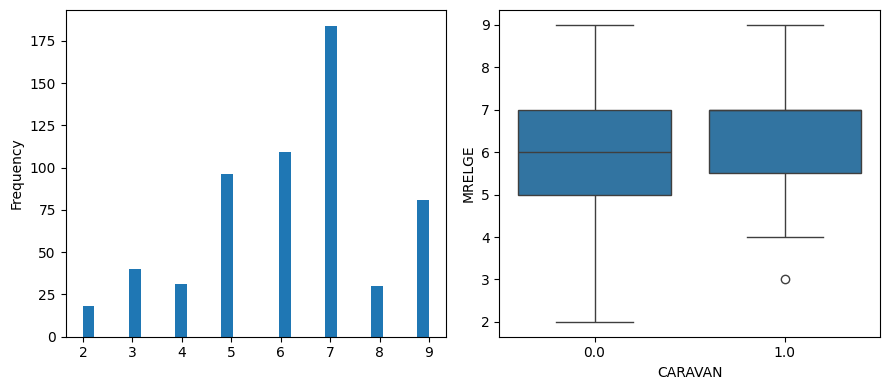

         count  mean  median  std  min  max
CARAVAN                                    
0          546   6.2     6.0  1.8  2.0  9.0
1           43   6.7     7.0  1.5  3.0  9.0 


=== MRELSA ===
 ---> Límites Outliers MRELSA 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MRELSA  0.0  2.0  2.0   -3.0    5.0         NaN       334.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          567  0.91     1.0  0.96  0.0  5.0
1           43  0.88     1.0  0.91  0.0  4.0 

variable        MRELSA
long_media        True
dif_mean          0.03
dif<10%           True
considerar          NO
cambia_rango        SI
dtype: object 



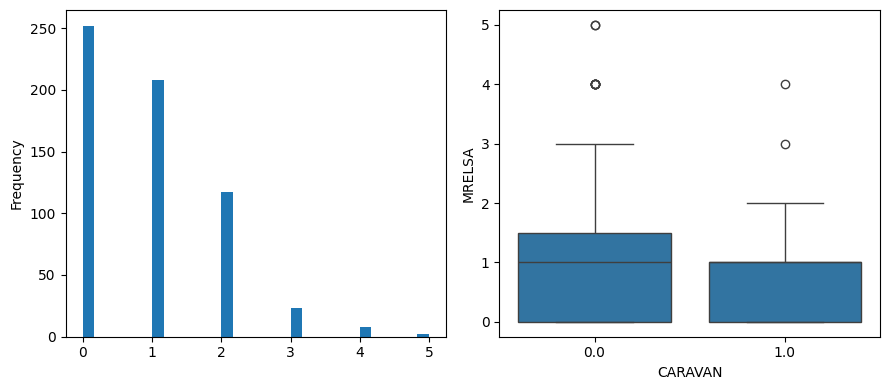

         count  mean  median   std  min  max
CARAVAN                                     
0          567  0.91     1.0  0.96  0.0  5.0
1           43  0.88     1.0  0.91  0.0  4.0 


=== MRELOV ===
 ---> Límites Outliers MRELOV 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MRELOV  1.0  3.0  2.0   -2.0    6.0         0.0      303.67 

         count  mean  median   std  min  max
CARAVAN                                     
0          556  2.31     2.0  1.64  0.0  6.0
1           44  1.84     2.0  1.43  0.0  5.0 

variable        MRELOV
long_media        True
dif_mean           0.2
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



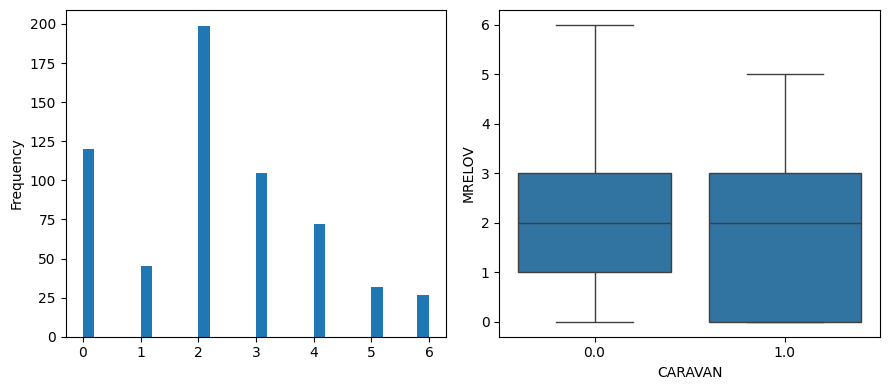

         count  mean  median   std  min  max
CARAVAN                                     
0          556  2.31     2.0  1.64  0.0  6.0
1           44  1.84     2.0  1.43  0.0  5.0 


=== MFALLEEN ===
 ---> Límites Outliers MFALLEEN 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MFALLEEN  0.0  3.0  3.0   -4.5    7.5         NaN      292.67 

         count  mean  median   std  min  max
CARAVAN                                     
0          569  2.06     2.0  1.90  0.0  7.0
1           43  1.28     1.0  1.37  0.0  5.0 

variable        MFALLEEN
long_media          True
dif_mean            0.38
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



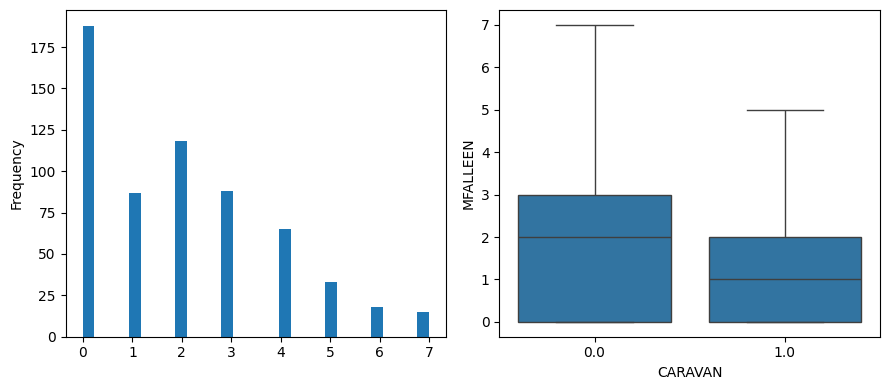

         count  mean  median   std  min  max
CARAVAN                                     
0          569  2.06     2.0  1.90  0.0  7.0
1           43  1.28     1.0  1.37  0.0  5.0 


=== MFGEKIND ===
 ---> Límites Outliers MFGEKIND 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MFGEKIND  2.0  4.0  2.0   -1.0    7.0         0.0       228.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          573  3.07     3.0  1.59  0.0  7.0
1           44  3.70     4.0  1.82  0.0  7.0 

variable        MFGEKIND
long_media          True
dif_mean            0.21
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



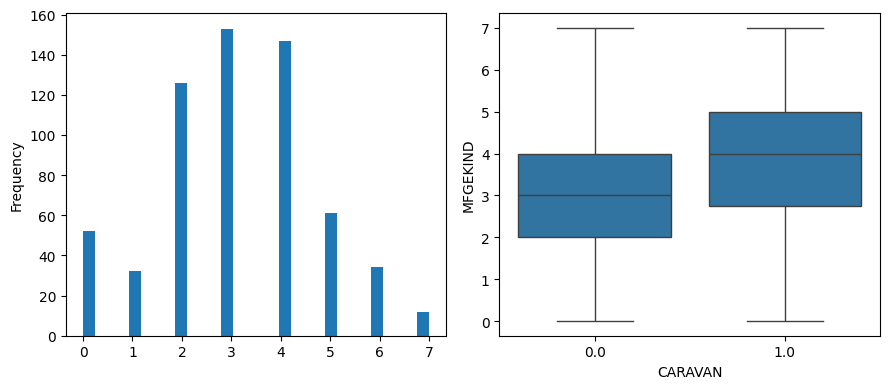

         count  mean  median   std  min  max
CARAVAN                                     
0          573  3.07     3.0  1.59  0.0  7.0
1           44  3.70     4.0  1.82  0.0  7.0 


=== MFWEKIND ===
 ---> Límites Outliers MFWEKIND 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MFWEKIND  3.0  6.0  3.0   -1.5   10.5         0.0      119.83 

         count  mean  median   std  min  max
CARAVAN                                     
0          576  4.17     4.0  2.14  0.0  9.0
1           43  4.23     4.0  2.13  1.0  8.0 

variable        MFWEKIND
long_media          True
dif_mean            0.01
dif<10%             True
considerar            NO
cambia_rango          SI
dtype: object 



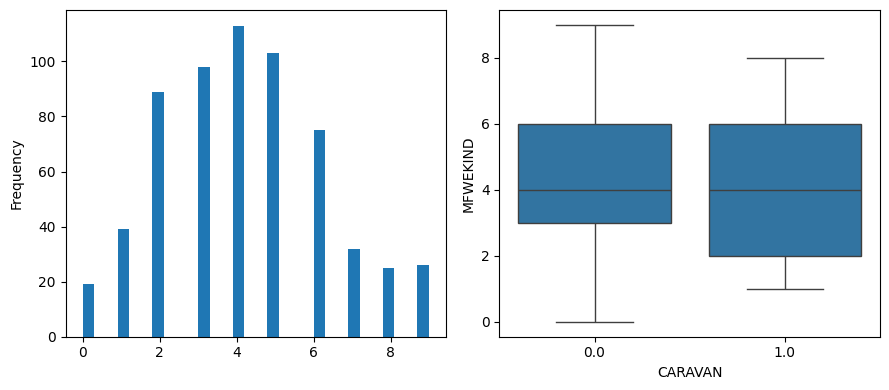

         count  mean  median   std  min  max
CARAVAN                                     
0          576  4.17     4.0  2.14  0.0  9.0
1           43  4.23     4.0  2.13  1.0  8.0 


=== MOPLHOOG ===
 ---> Límites Outliers MOPLHOOG 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MOPLHOOG  0.0  2.0  2.0   -3.0    5.0         NaN       243.5 

         count  mean  median   std  min  max
CARAVAN                                     
0          559  1.31     1.0  1.37  0.0  5.0
1           40  1.78     1.0  1.48  0.0  5.0 

variable        MOPLHOOG
long_media          True
dif_mean            0.36
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



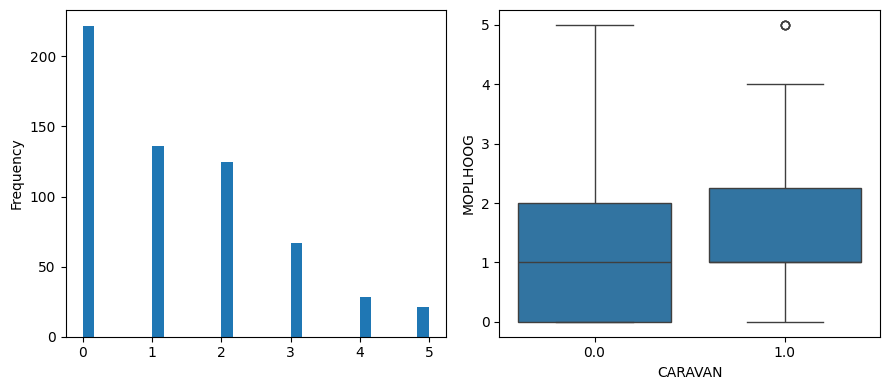

         count  mean  median   std  min  max
CARAVAN                                     
0          559  1.31     1.0  1.37  0.0  5.0
1           40  1.78     1.0  1.48  0.0  5.0 


=== MOPLMIDD ===
 ---> Límites Outliers MOPLMIDD 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MOPLMIDD  2.0  4.0  2.0   -1.0    7.0         0.0        80.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          568  3.19     3.0  1.70  0.0  7.0
1           44  3.52     4.0  1.58  0.0  7.0 

variable        MOPLMIDD
long_media          True
dif_mean             0.1
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



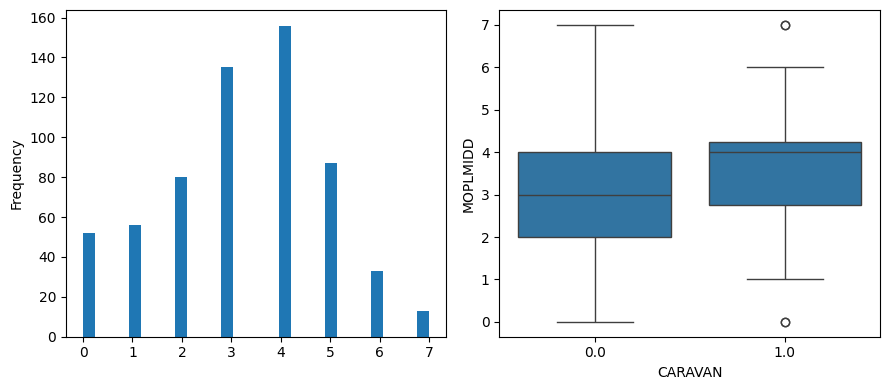

         count  mean  median   std  min  max
CARAVAN                                     
0          568  3.19     3.0  1.70  0.0  7.0
1           44  3.52     4.0  1.58  0.0  7.0 


=== MOPLLAAG ===
 ---> Límites Outliers MOPLLAAG 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MOPLLAAG  3.0  6.0  3.0   -1.5   10.5         0.0      129.83 

         count  mean  median   std  min  max
CARAVAN                                     
0          574  4.61     5.0  2.33  0.0  9.0
1           44  3.68     4.0  2.28  0.0  9.0 

variable        MOPLLAAG
long_media          True
dif_mean             0.2
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



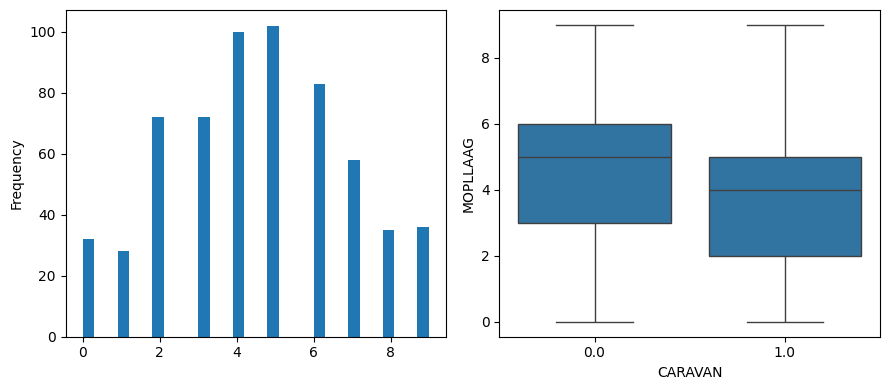

         count  mean  median   std  min  max
CARAVAN                                     
0          574  4.61     5.0  2.33  0.0  9.0
1           44  3.68     4.0  2.28  0.0  9.0 


=== MBERHOOG ===
 ---> Límites Outliers MBERHOOG 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MBERHOOG  0.0  3.0  3.0   -4.5    7.5         NaN      108.67 

         count  mean  median   std  min  max
CARAVAN                                     
0          574  1.93     2.0  1.74  0.0  7.0
1           44  2.34     2.0  1.79  0.0  6.0 

variable        MBERHOOG
long_media          True
dif_mean            0.21
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



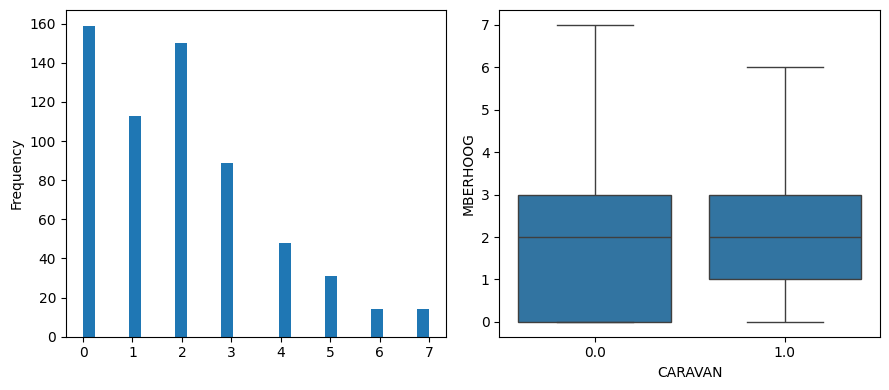

         count  mean  median   std  min  max
CARAVAN                                     
0          574  1.93     2.0  1.74  0.0  7.0
1           44  2.34     2.0  1.79  0.0  6.0 


=== MBERZELF ===
 ---> Límites Outliers MBERZELF 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MBERZELF  0.0  1.0  1.0   -1.5    2.5         NaN       839.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          566  0.35     0.0  0.60  0.0  2.0
1           43  0.58     0.0  0.66  0.0  2.0 

variable        MBERZELF
long_media          True
dif_mean            0.66
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



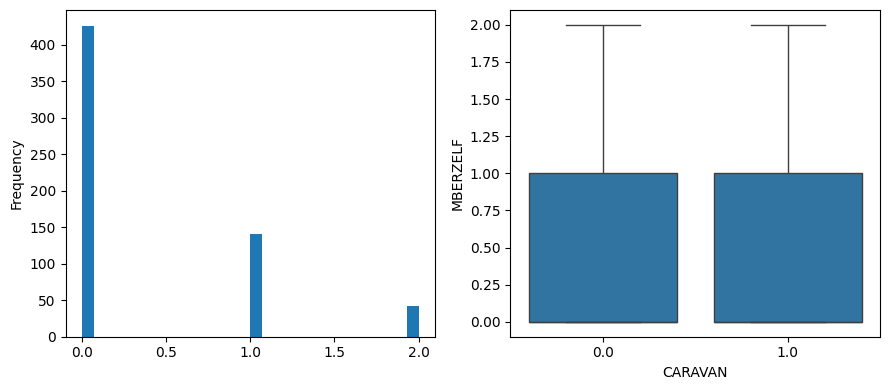

         count  mean  median   std  min  max
CARAVAN                                     
0          566  0.35     0.0  0.60  0.0  2.0
1           43  0.58     0.0  0.66  0.0  2.0 


=== MBERMIDD ===
 ---> Límites Outliers MBERMIDD 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MBERMIDD  2.0  4.0  2.0   -1.0    7.0         0.0       175.5 

         count  mean  median   std  min  max
CARAVAN                                     
0          571  2.69     3.0  1.73  0.0  7.0
1           44  2.98     2.5  1.85  0.0  7.0 

variable        MBERMIDD
long_media          True
dif_mean            0.11
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



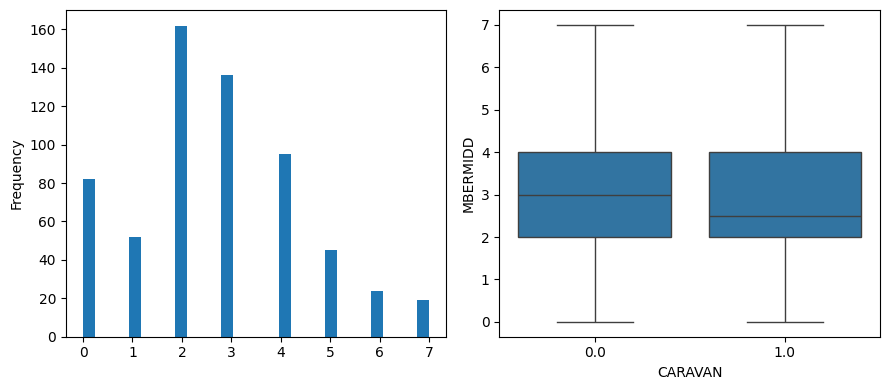

         count  mean  median   std  min  max
CARAVAN                                     
0          571  2.69     3.0  1.73  0.0  7.0
1           44  2.98     2.5  1.85  0.0  7.0 


=== MBERARBG ===
 ---> Límites Outliers MBERARBG 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MBERARBG  1.0  3.0  2.0   -2.0    6.0         0.0      290.33 

         count  mean  median   std  min  max
CARAVAN                                     
0          561  2.12     2.0  1.60  0.0  6.0
1           41  1.85     2.0  1.49  0.0  5.0 

variable        MBERARBG
long_media          True
dif_mean            0.13
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



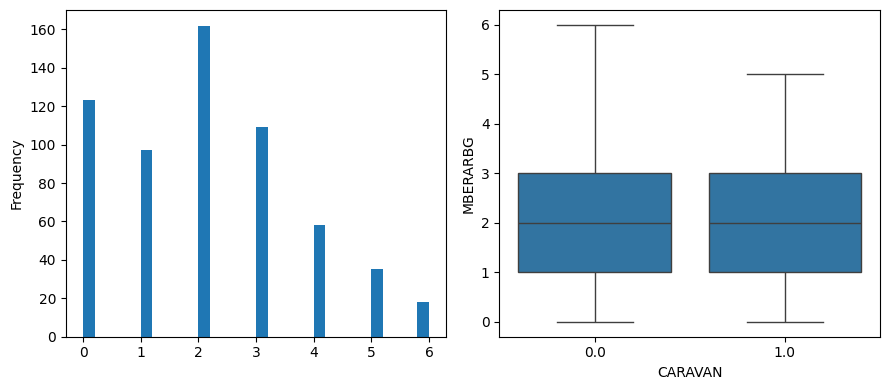

         count  mean  median   std  min  max
CARAVAN                                     
0          561  2.12     2.0  1.60  0.0  6.0
1           41  1.85     2.0  1.49  0.0  5.0 


=== MBERARBO ===
 ---> Límites Outliers MBERARBO 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MBERARBO  1.0  3.0  2.0   -2.0    6.0         0.0      107.67 

         count  mean  median   std  min  max
CARAVAN                                     
0          568  2.31     2.0  1.57  0.0  6.0
1           44  1.68     2.0  1.31  0.0  5.0 

variable        MBERARBO
long_media          True
dif_mean            0.27
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



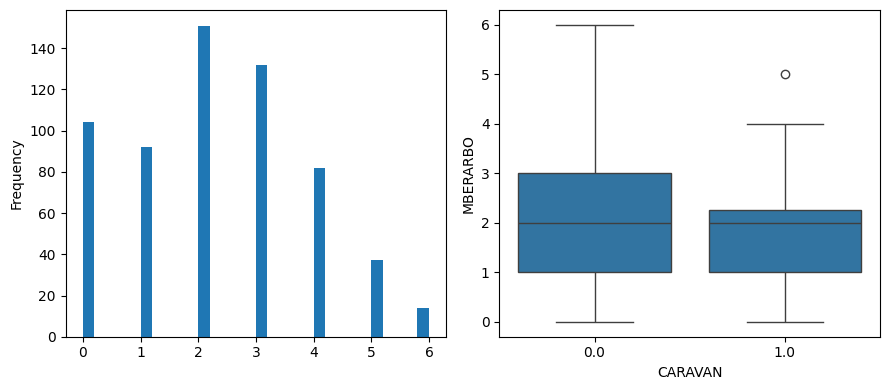

         count  mean  median   std  min  max
CARAVAN                                     
0          568  2.31     2.0  1.57  0.0  6.0
1           44  1.68     2.0  1.31  0.0  5.0 


=== MSKB1 ===
 ---> Límites Outliers MSKB1 
         Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MSKB1  0.0  2.0  2.0   -3.0    5.0         NaN     28719.5 

         count  mean  median   std  min  max
CARAVAN                                     
0          566  1.51     1.0  1.27  0.0  5.0
1           42  1.36     1.0  1.03  0.0  4.0 

variable        MSKB1
long_media       True
dif_mean          0.1
dif<10%         False
considerar         SI
cambia_rango       SI
dtype: object 



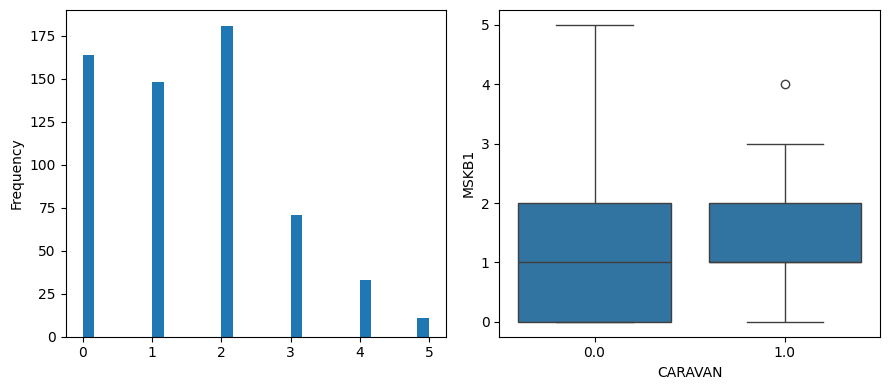

         count  mean  median   std  min  max
CARAVAN                                     
0          566  1.51     1.0  1.27  0.0  5.0
1           42  1.36     1.0  1.03  0.0  4.0 


=== MSKB2 ===
 ---> Límites Outliers MSKB2 
         Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MSKB2  1.0  3.0  2.0   -2.0    6.0         0.0       228.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          571  2.08     2.0  1.51  0.0  6.0
1           44  2.18     2.0  1.26  0.0  4.0 

variable        MSKB2
long_media       True
dif_mean         0.05
dif<10%          True
considerar         NO
cambia_rango       SI
dtype: object 



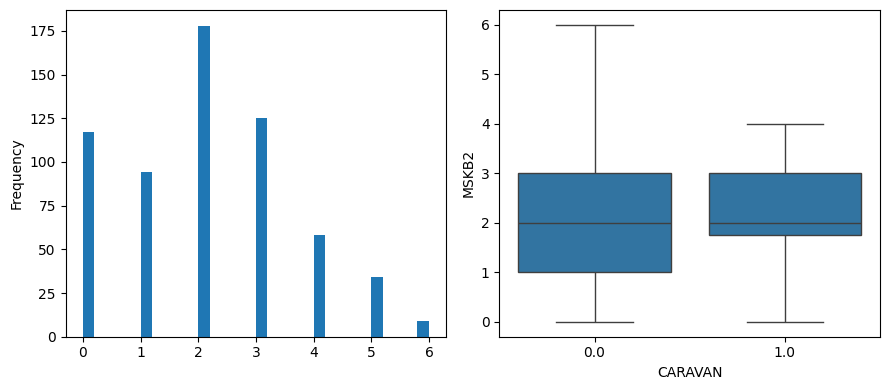

         count  mean  median   std  min  max
CARAVAN                                     
0          571  2.08     2.0  1.51  0.0  6.0
1           44  2.18     2.0  1.26  0.0  4.0 


=== MSKC ===
 ---> Límites Outliers MSKC 
        Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MSKC  2.0  5.0  3.0   -2.5    9.5         0.0      1201.2 

         count  mean  median   std  min  max
CARAVAN                                     
0          574  3.80     4.0  1.95  0.0  9.0
1           44  3.55     3.0  2.23  0.0  9.0 

variable        MSKC
long_media      True
dif_mean        0.07
dif<10%         True
considerar        NO
cambia_rango      NO
dtype: object 



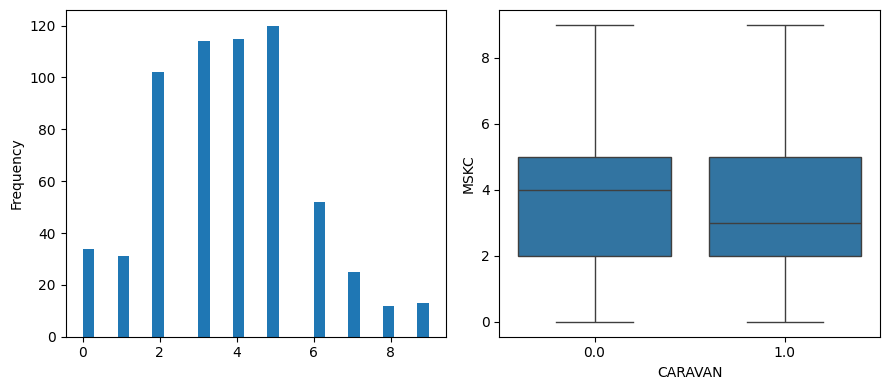

         count  mean  median   std  min  max
CARAVAN                                     
0          574  3.80     4.0  1.95  0.0  9.0
1           44  3.55     3.0  2.23  0.0  9.0 


=== MSKD ===
 ---> Límites Outliers MSKD 
        Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MSKD  0.0  2.0  2.0   -3.0    5.0         NaN       386.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          571  1.15     1.0  1.31  0.0  5.0
1           43  0.77     1.0  0.92  0.0  4.0 

variable         MSKD
long_media       True
dif_mean         0.33
dif<10%         False
considerar         SI
cambia_rango       SI
dtype: object 



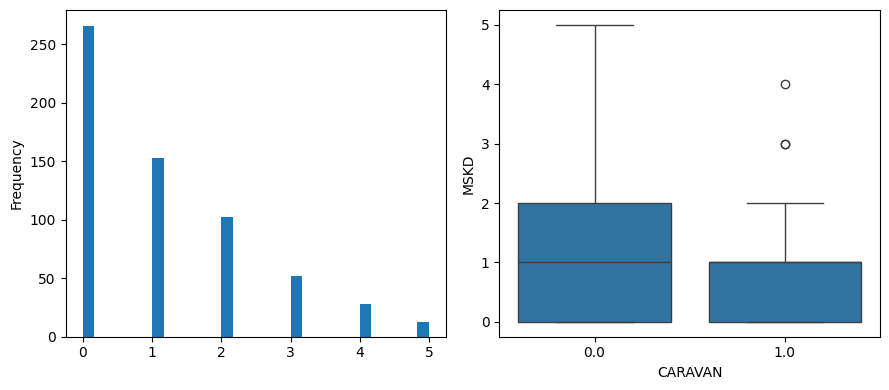

         count  mean  median   std  min  max
CARAVAN                                     
0          571  1.15     1.0  1.31  0.0  5.0
1           43  0.77     1.0  0.92  0.0  4.0 


=== MHHUUR ===
 ---> Límites Outliers MHHUUR 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MHHUUR  2.0  7.0  5.0   -5.5   14.5         0.0       82.29 

         count  mean  median   std  min  max
CARAVAN                                     
0          577  4.34     4.0  3.10  0.0  9.0
1           43  2.74     2.0  2.37  0.0  9.0 

variable        MHHUUR
long_media        True
dif_mean          0.37
dif<10%          False
considerar          SI
cambia_rango        NO
dtype: object 



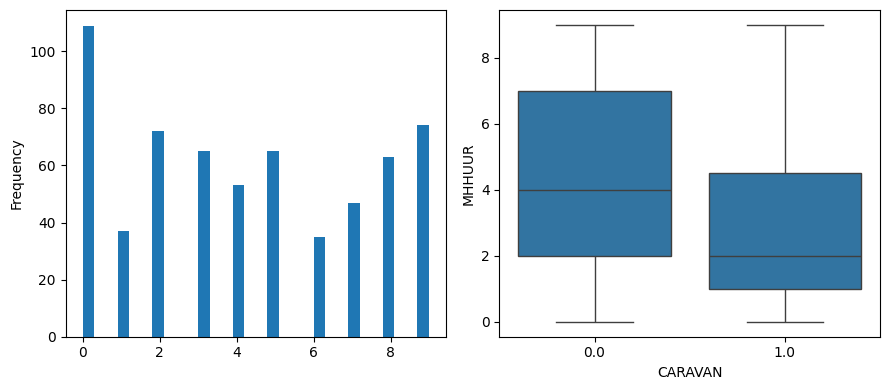

         count  mean  median   std  min  max
CARAVAN                                     
0          577  4.34     4.0  3.10  0.0  9.0
1           43  2.74     2.0  2.37  0.0  9.0 


=== MHKOOP ===
 ---> Límites Outliers MHKOOP 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MHKOOP  2.0  7.0  5.0   -5.5   14.5         0.0        87.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          573  4.67     5.0  3.11  0.0  9.0
1           44  6.20     6.5  2.37  0.0  9.0 

variable        MHKOOP
long_media        True
dif_mean          0.33
dif<10%          False
considerar          SI
cambia_rango        NO
dtype: object 



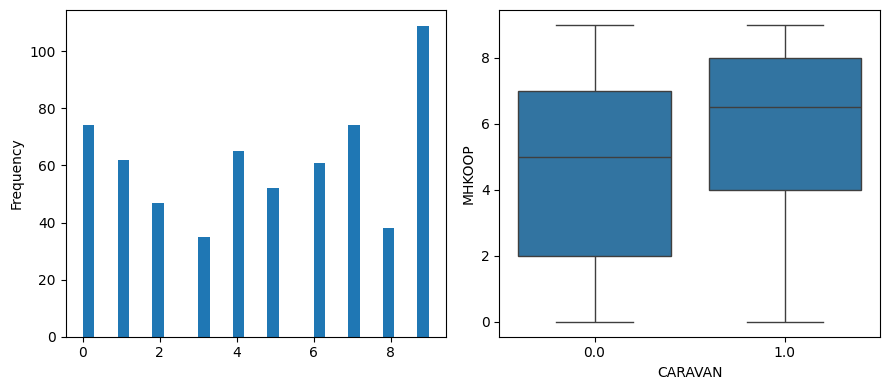

         count  mean  median   std  min  max
CARAVAN                                     
0          573  4.67     5.0  3.11  0.0  9.0
1           44  6.20     6.5  2.37  0.0  9.0 


=== MAUT1 ===
 ---> Límites Outliers MAUT1 
         Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MAUT1  5.0  7.0  2.0    2.0   10.0         0.0      125.43 

         count  mean  median   std  min  max
CARAVAN                                     
0          568  6.03     6.0  1.54  2.0  9.0
1           42  6.38     6.0  1.27  3.0  9.0 

variable        MAUT1
long_media       True
dif_mean         0.06
dif<10%          True
considerar         NO
cambia_rango       SI
dtype: object 



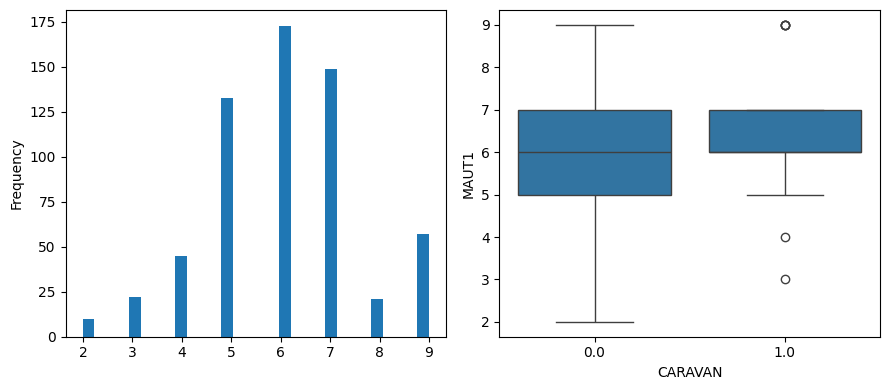

         count  mean  median   std  min  max
CARAVAN                                     
0          568  6.03     6.0  1.54  2.0  9.0
1           42  6.38     6.0  1.27  3.0  9.0 


=== MAUT2 ===
 ---> Límites Outliers MAUT2 
         Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MAUT2  0.0  2.0  2.0   -3.0    5.0         NaN       156.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          576  1.28     1.0  1.19  0.0  5.0
1           41  1.41     1.0  0.97  0.0  4.0 

variable        MAUT2
long_media       True
dif_mean          0.1
dif<10%         False
considerar         SI
cambia_rango       SI
dtype: object 



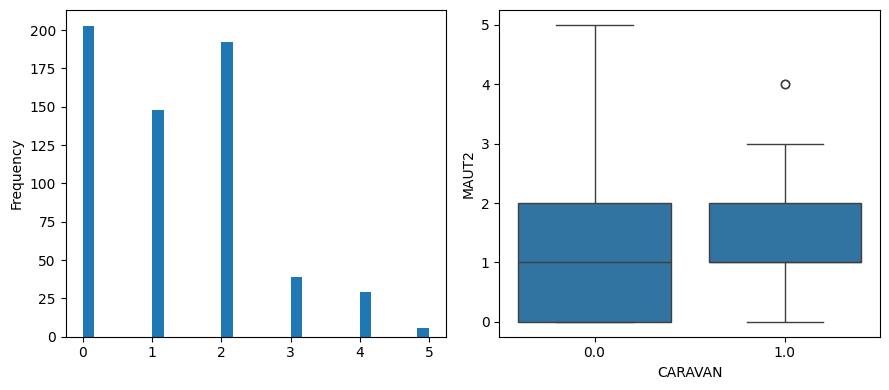

         count  mean  median   std  min  max
CARAVAN                                     
0          576  1.28     1.0  1.19  0.0  5.0
1           41  1.41     1.0  0.97  0.0  4.0 


=== MAUT0 ===
 ---> Límites Outliers MAUT0 
         Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MAUT0  1.0  3.0  2.0   -2.0    6.0         0.0       310.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          567  1.95     2.0  1.53  0.0  6.0
1           44  1.50     2.0  1.19  0.0  4.0 

variable        MAUT0
long_media       True
dif_mean         0.23
dif<10%         False
considerar         SI
cambia_rango       SI
dtype: object 



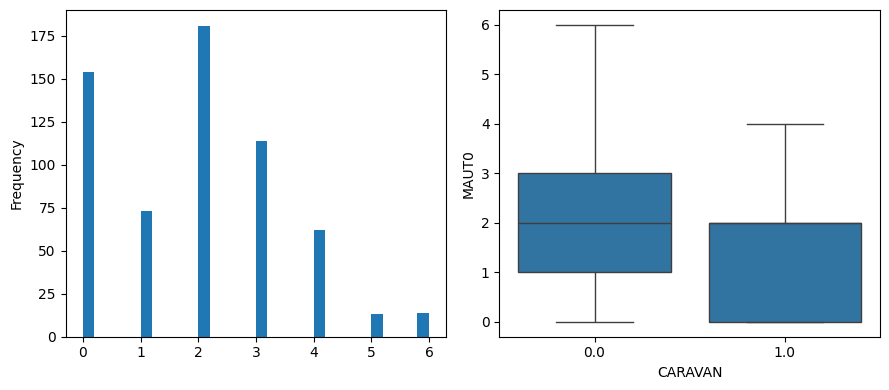

         count  mean  median   std  min  max
CARAVAN                                     
0          567  1.95     2.0  1.53  0.0  6.0
1           44  1.50     2.0  1.19  0.0  4.0 


=== MZFONDS ===
 ---> Límites Outliers MZFONDS 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MZFONDS  5.0  8.0  3.0    0.5   12.5         0.0        88.5 

         count  mean  median   std  min  max
CARAVAN                                     
0          567  6.40     7.0  1.95  1.0  9.0
1           42  5.88     6.5  2.00  2.0  9.0 

variable        MZFONDS
long_media         True
dif_mean           0.08
dif<10%            True
considerar           NO
cambia_rango         SI
dtype: object 



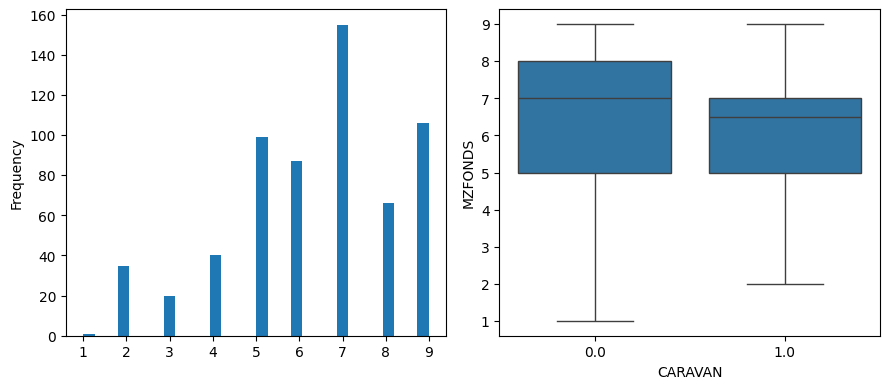

         count  mean  median   std  min  max
CARAVAN                                     
0          567  6.40     7.0  1.95  1.0  9.0
1           42  5.88     6.5  2.00  2.0  9.0 


=== MZPART ===
 ---> Límites Outliers MZPART 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MZPART  1.0  4.0  3.0   -3.5    8.5         0.0      169.75 

         count  mean  median   std  min  max
CARAVAN                                     
0          567  2.59     2.0  1.94  0.0  8.0
1           42  3.12     2.5  2.00  0.0  7.0 

variable        MZPART
long_media        True
dif_mean           0.2
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



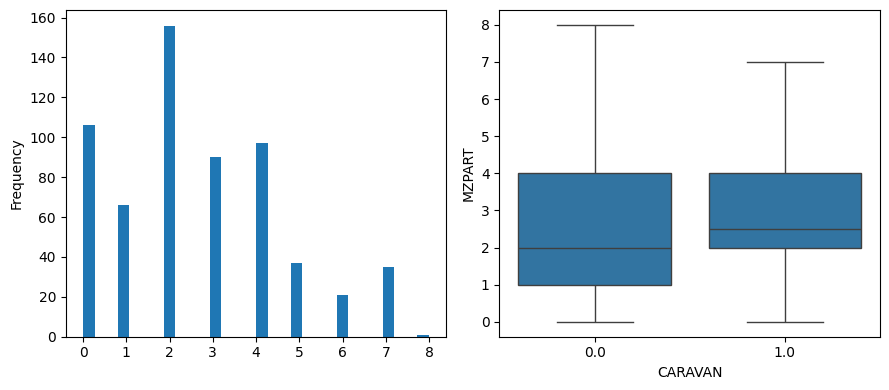

         count  mean  median   std  min  max
CARAVAN                                     
0          567  2.59     2.0  1.94  0.0  8.0
1           42  3.12     2.5  2.00  0.0  7.0 


=== MINKM30 ===
 ---> Límites Outliers MINKM30 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MINKM30  1.0  4.0  3.0   -3.5    8.5         0.0      232.75 

         count  mean  median   std  min  max
CARAVAN                                     
0          570  2.62     2.0  2.08  0.0  8.0
1           43  1.93     2.0  1.70  0.0  6.0 

variable        MINKM30
long_media         True
dif_mean           0.26
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



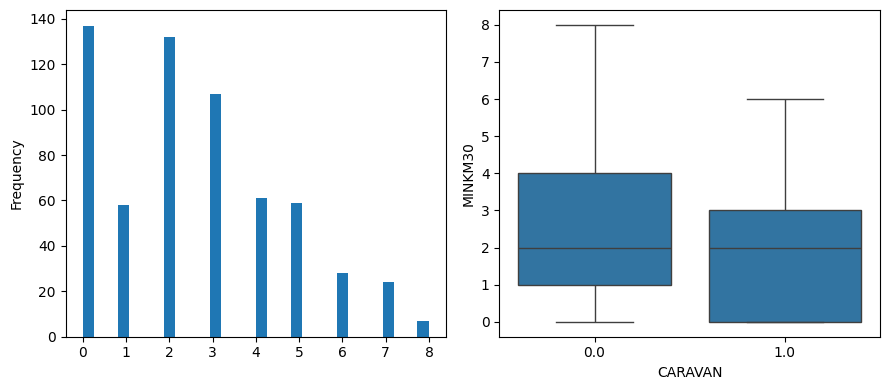

         count  mean  median   std  min  max
CARAVAN                                     
0          570  2.62     2.0  2.08  0.0  8.0
1           43  1.93     2.0  1.70  0.0  6.0 


=== MINK3045 ===
 ---> Límites Outliers MINK3045 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MINK3045  2.0  5.0  3.0   -2.5    9.5         0.0       178.2 

         count  mean  median   std  min  max
CARAVAN                                     
0          575  3.54     4.0  1.90  0.0  9.0
1           44  3.34     3.0  1.67  0.0  7.0 

variable        MINK3045
long_media          True
dif_mean            0.06
dif<10%             True
considerar            NO
cambia_rango          SI
dtype: object 



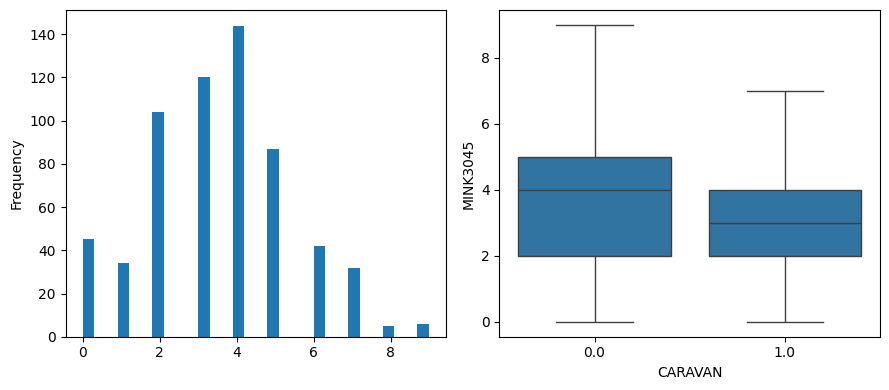

         count  mean  median   std  min  max
CARAVAN                                     
0          575  3.54     4.0  1.90  0.0  9.0
1           44  3.34     3.0  1.67  0.0  7.0 


=== MINK4575 ===
 ---> Límites Outliers MINK4575 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MINK4575  1.0  4.0  3.0   -3.5    8.5         0.0      232.75 

         count  mean  median   std  min  max
CARAVAN                                     
0          571  2.58     3.0  1.80  0.0  8.0
1           43  3.00     3.0  1.84  0.0  8.0 

variable        MINK4575
long_media          True
dif_mean            0.16
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



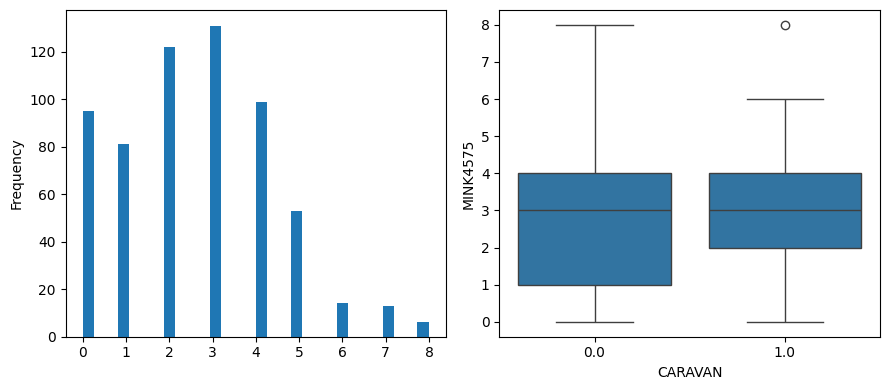

         count  mean  median   std  min  max
CARAVAN                                     
0          571  2.58     3.0  1.80  0.0  8.0
1           43  3.00     3.0  1.84  0.0  8.0 


=== MINK7512 ===
 ---> Límites Outliers MINK7512 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MINK7512  0.0  1.0  1.0   -1.5    2.5         NaN       929.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          527  0.52     0.0  0.72  0.0  2.0
1           37  1.05     1.0  0.78  0.0  2.0 

variable        MINK7512
long_media          True
dif_mean            1.02
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



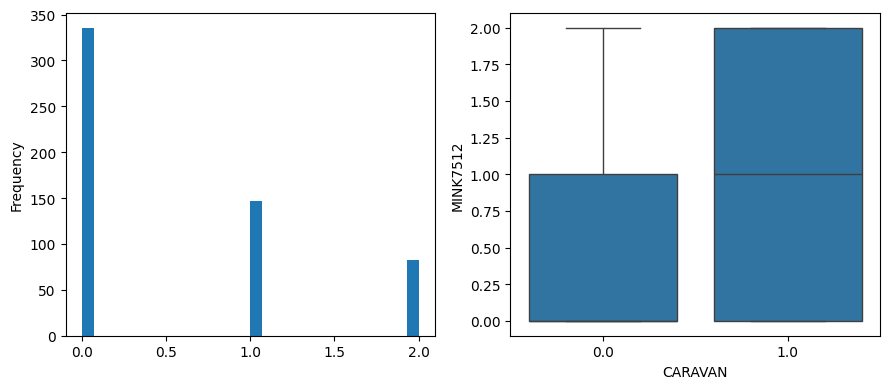

         count  mean  median   std  min  max
CARAVAN                                     
0          527  0.52     0.0  0.72  0.0  2.0
1           37  1.05     1.0  0.78  0.0  2.0 


=== MINK123M ===
 ---> Límites Outliers MINK123M 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MINK123M  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          479   0.0     0.0  0.0  0.0  0.0
1           35   0.0     0.0  0.0  0.0  0.0 

variable        MINK123M
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


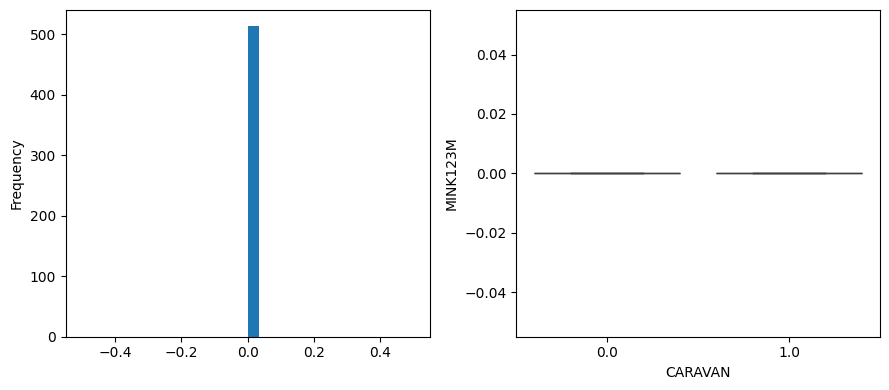

         count  mean  median  std  min  max
CARAVAN                                    
0          479   0.0     0.0  0.0  0.0  0.0
1           35   0.0     0.0  0.0  0.0  0.0 


=== MINKGEM ===
 ---> Límites Outliers MINKGEM 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
MINKGEM  3.0  4.0  1.0    1.5    5.5         0.0      229.75 

         count  mean  median   std  min  max
CARAVAN                                     
0          516  3.46     3.0  0.92  2.0  5.0
1           35  3.91     4.0  0.85  2.0  5.0 

variable        MINKGEM
long_media         True
dif_mean           0.13
dif<10%           False
considerar           SI
cambia_rango         NO
dtype: object 



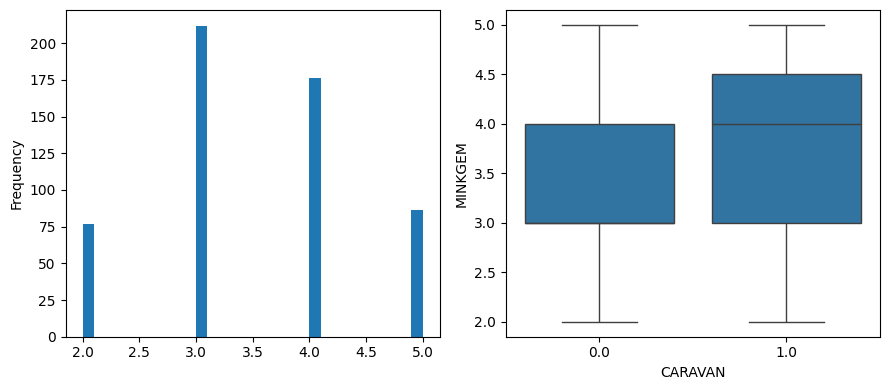

         count  mean  median   std  min  max
CARAVAN                                     
0          516  3.46     3.0  0.92  2.0  5.0
1           35  3.91     4.0  0.85  2.0  5.0 


=== PWABEDR ===
 ---> Límites Outliers PWABEDR 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PWABEDR  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          574   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        PWABEDR
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


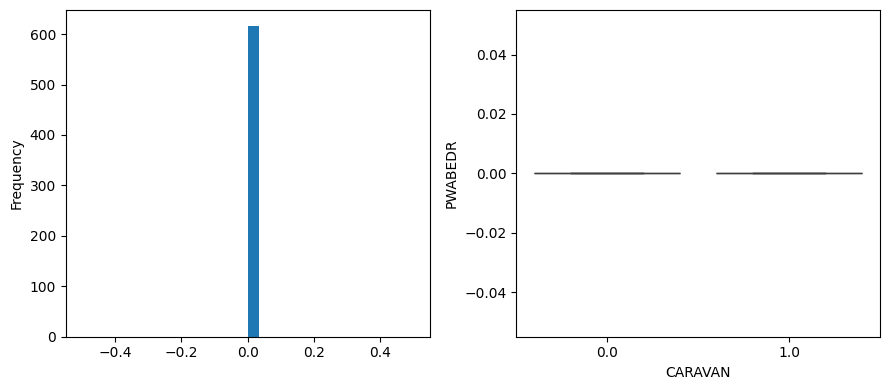

         count  mean  median  std  min  max
CARAVAN                                    
0          574   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== PWALAND ===
 ---> Límites Outliers PWALAND 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PWALAND  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          575   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        PWALAND
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


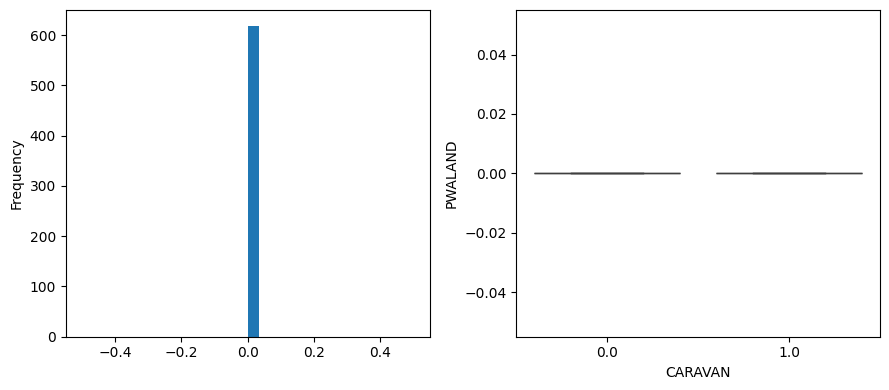

         count  mean  median  std  min  max
CARAVAN                                    
0          575   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== PPERSAUT ===
 ---> Límites Outliers PPERSAUT 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PPERSAUT  0.0  6.0  6.0   -9.0   15.0         NaN        98.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          578  3.49     5.0  2.89  0.0  7.0
1           43  5.12     6.0  2.10  0.0  6.0 

variable        PPERSAUT
long_media          True
dif_mean            0.47
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



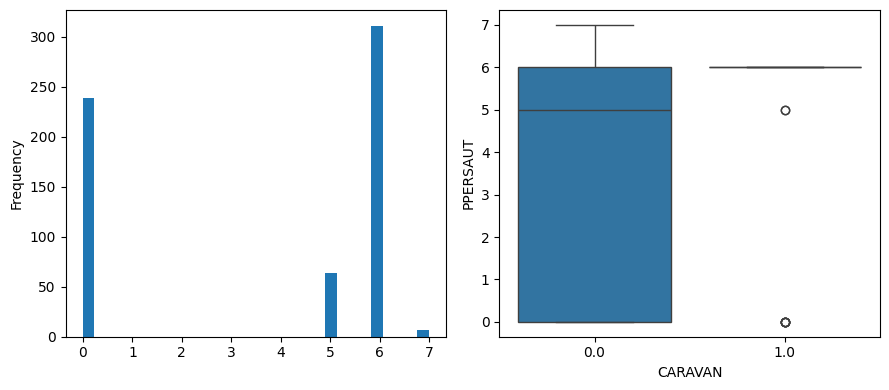

         count  mean  median   std  min  max
CARAVAN                                     
0          578  3.49     5.0  2.89  0.0  7.0
1           43  5.12     6.0  2.10  0.0  6.0 


=== PBESAUT ===
 ---> Límites Outliers PBESAUT 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PBESAUT  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          574   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        PBESAUT
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


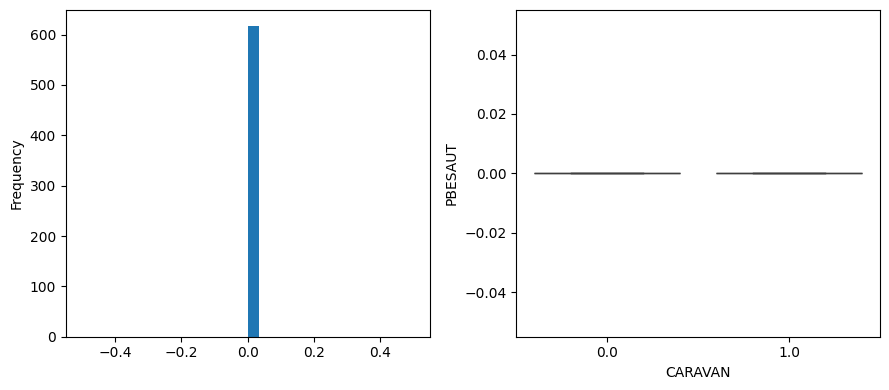

         count  mean  median  std  min  max
CARAVAN                                    
0          574   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== PMOTSCO ===
 ---> Límites Outliers PMOTSCO 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PMOTSCO  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          556   0.0     0.0  0.0  0.0  0.0
1           38   0.0     0.0  0.0  0.0  0.0 

variable        PMOTSCO
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


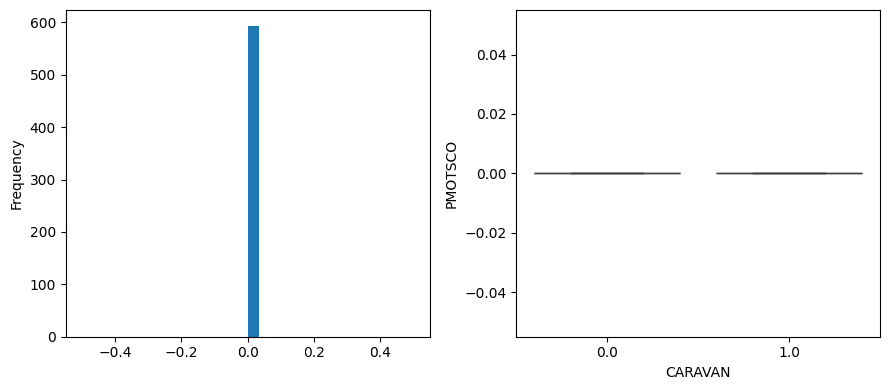

         count  mean  median  std  min  max
CARAVAN                                    
0          556   0.0     0.0  0.0  0.0  0.0
1           38   0.0     0.0  0.0  0.0  0.0 


=== PVRAAUT ===
 ---> Límites Outliers PVRAAUT 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PVRAAUT  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          578   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        PVRAAUT
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


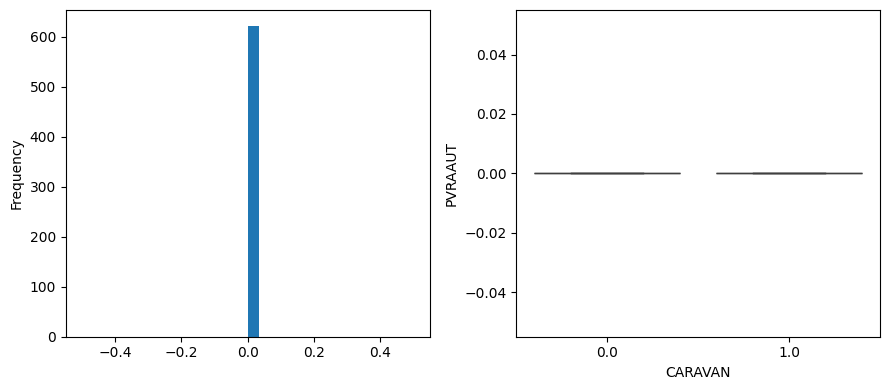

         count  mean  median  std  min  max
CARAVAN                                    
0          578   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== PAANHANG ===
 ---> Límites Outliers PAANHANG 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PAANHANG  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          569   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        PAANHANG
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


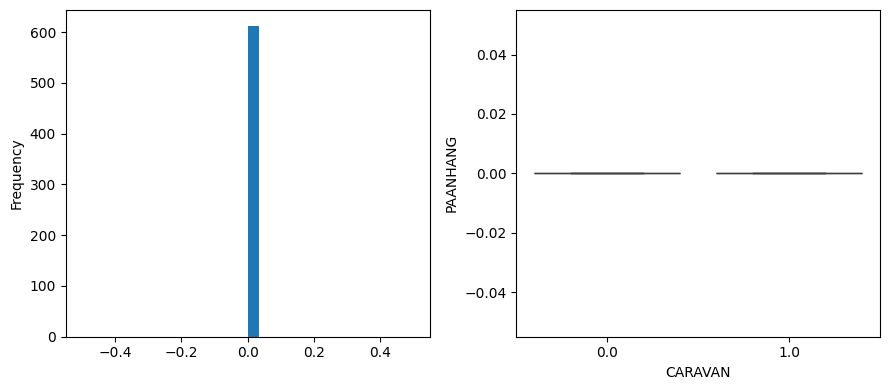

         count  mean  median  std  min  max
CARAVAN                                    
0          569   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== PTRACTOR ===
 ---> Límites Outliers PTRACTOR 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PTRACTOR  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        PTRACTOR
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


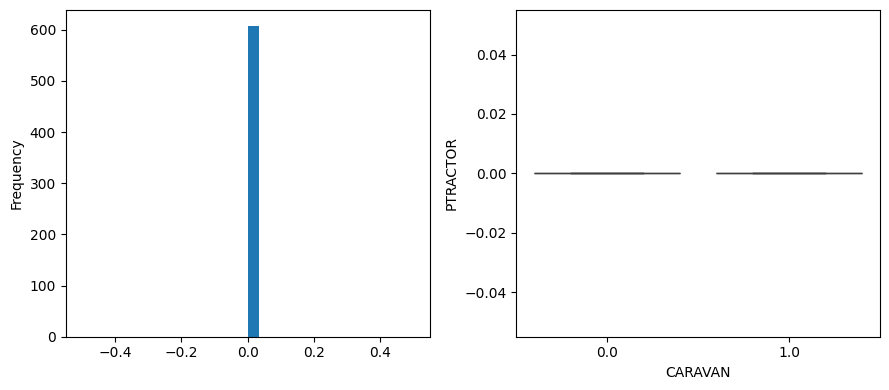

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== PWERKT ===
 ---> Límites Outliers PWERKT 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PWERKT  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        PWERKT
long_media       False
dif_mean           NaN
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


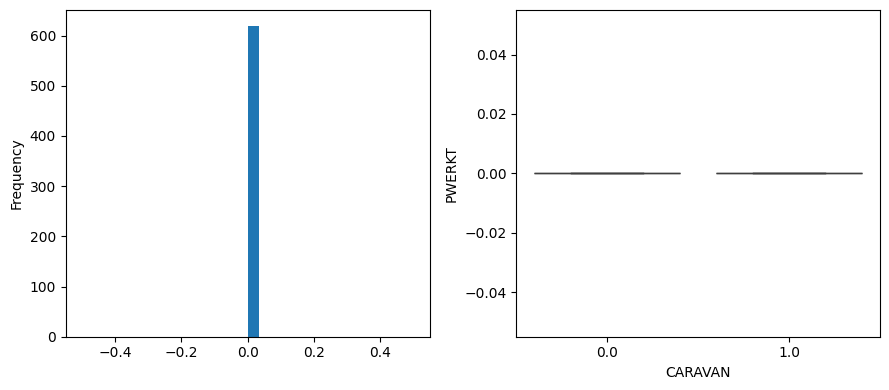

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== PBROM ===
 ---> Límites Outliers PBROM 
         Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PBROM  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        PBROM
long_media      False
dif_mean          NaN
dif<10%         False
considerar         SI
cambia_rango       SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


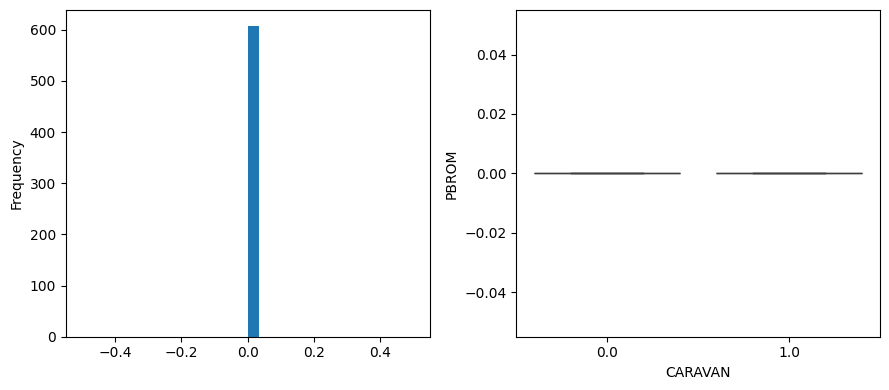

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== PLEVEN ===
 ---> Límites Outliers PLEVEN 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PLEVEN  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          524   0.0     0.0  0.0  0.0  0.0
1           39   0.0     0.0  0.0  0.0  0.0 

variable        PLEVEN
long_media       False
dif_mean           NaN
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


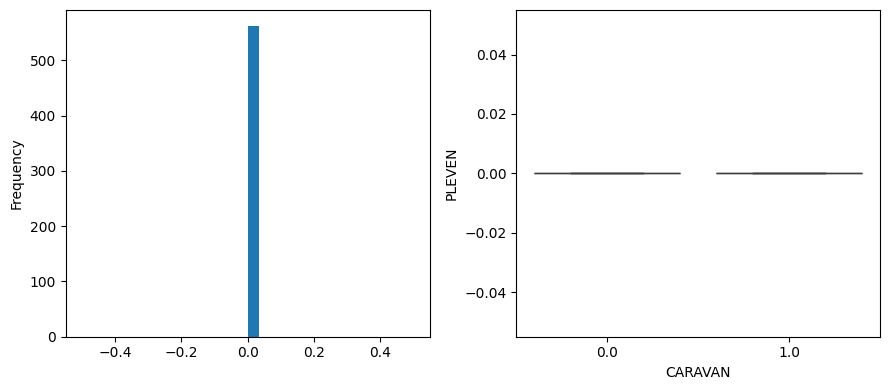

         count  mean  median  std  min  max
CARAVAN                                    
0          524   0.0     0.0  0.0  0.0  0.0
1           39   0.0     0.0  0.0  0.0  0.0 


=== PPERSONG ===
 ---> Límites Outliers PPERSONG 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PPERSONG  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          573   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        PPERSONG
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


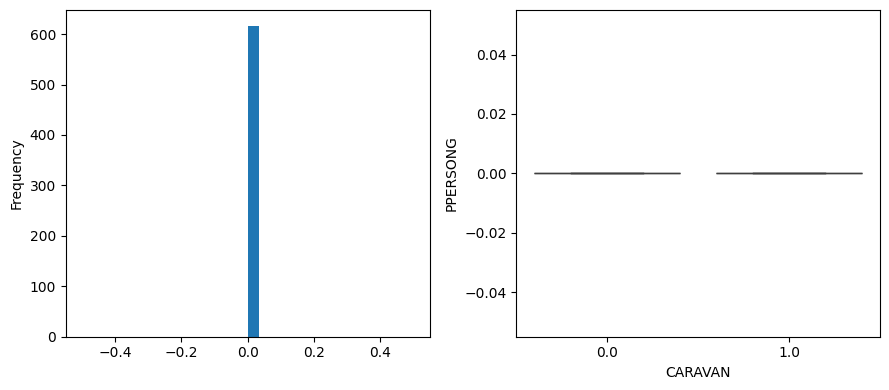

         count  mean  median  std  min  max
CARAVAN                                    
0          573   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== PGEZONG ===
 ---> Límites Outliers PGEZONG 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PGEZONG  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           42   0.0     0.0  0.0  0.0  0.0 

variable        PGEZONG
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


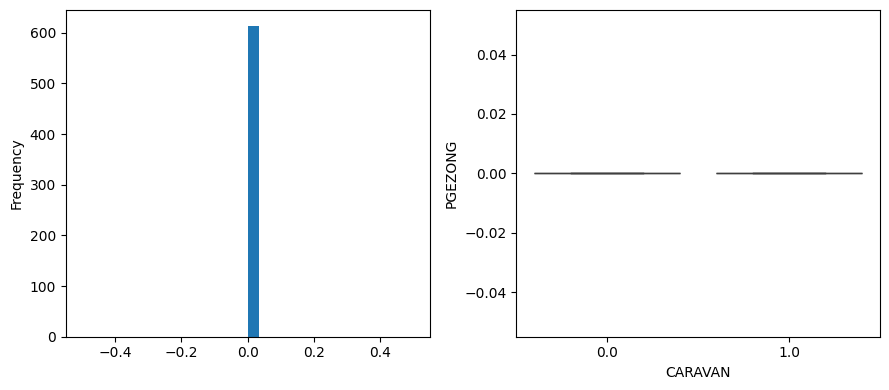

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           42   0.0     0.0  0.0  0.0  0.0 


=== PWAOREG ===
 ---> Límites Outliers PWAOREG 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PWAOREG  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        PWAOREG
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


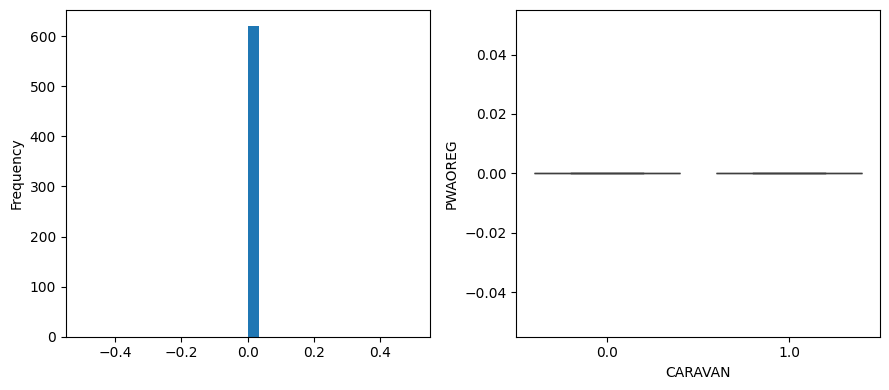

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== PBRAND ===
 ---> Límites Outliers PBRAND 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PBRAND  2.0  4.0  2.0   -1.0    7.0         0.0      216.25 

         count  mean  median   std  min  max
CARAVAN                                     
0          571  2.94     3.0  1.42  0.0  6.0
1           44  3.41     4.0  1.28  0.0  5.0 

variable        PBRAND
long_media        True
dif_mean          0.16
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



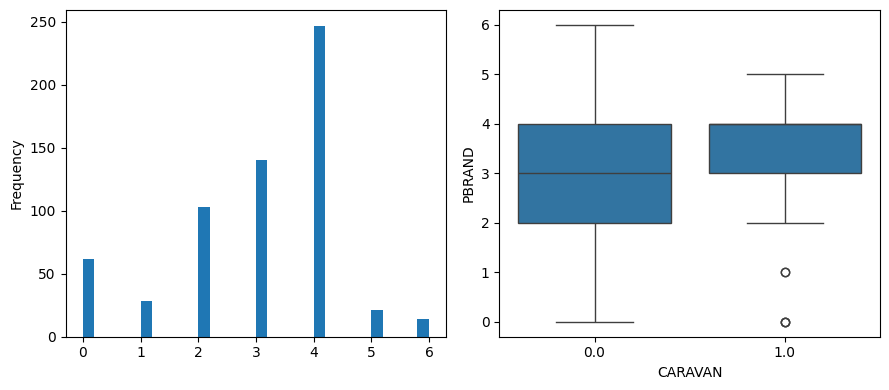

         count  mean  median   std  min  max
CARAVAN                                     
0          571  2.94     3.0  1.42  0.0  6.0
1           44  3.41     4.0  1.28  0.0  5.0 


=== PZEILPL ===
 ---> Límites Outliers PZEILPL 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PZEILPL  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          579   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        PZEILPL
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


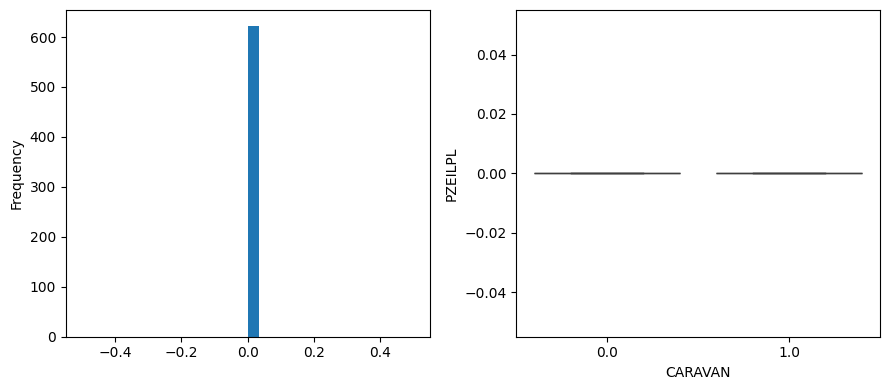

         count  mean  median  std  min  max
CARAVAN                                    
0          579   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== PPLEZIER ===
 ---> Límites Outliers PPLEZIER 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PPLEZIER  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        PPLEZIER
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


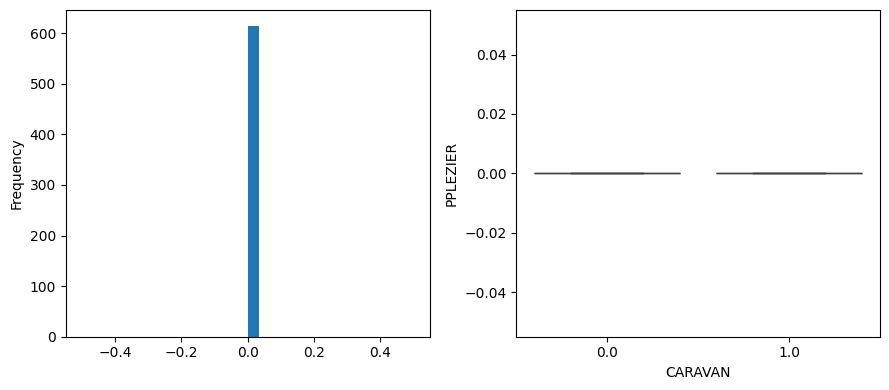

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== PFIETS ===
 ---> Límites Outliers PFIETS 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PFIETS  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          564   0.0     0.0  0.0  0.0  0.0
1           40   0.0     0.0  0.0  0.0  0.0 

variable        PFIETS
long_media       False
dif_mean           NaN
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


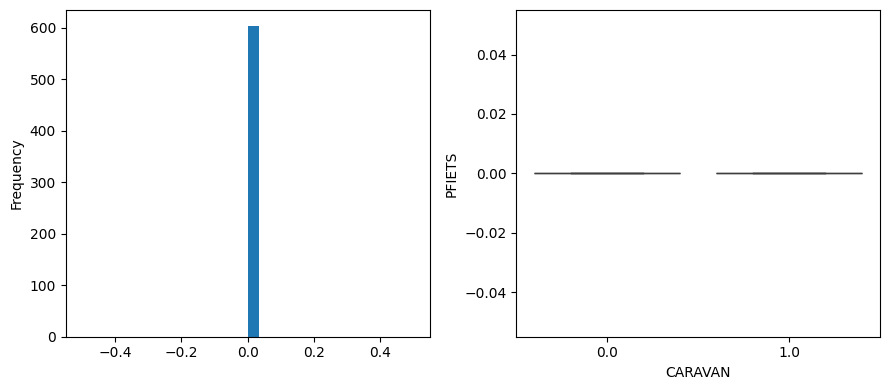

         count  mean  median  std  min  max
CARAVAN                                    
0          564   0.0     0.0  0.0  0.0  0.0
1           40   0.0     0.0  0.0  0.0  0.0 


=== PINBOED ===
 ---> Límites Outliers PINBOED 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PINBOED  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          568   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        PINBOED
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


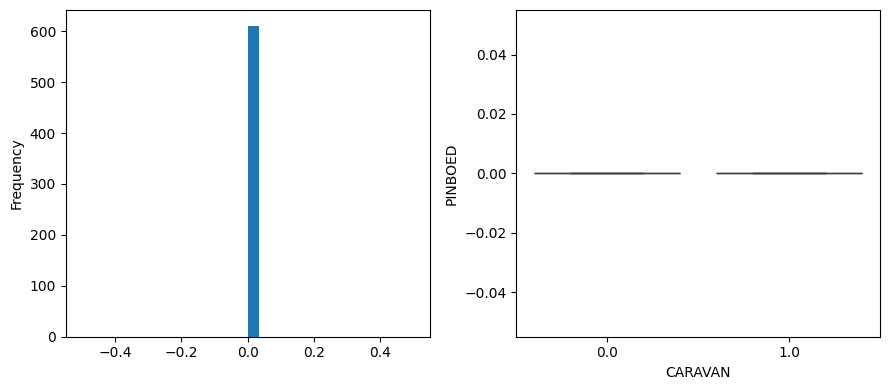

         count  mean  median  std  min  max
CARAVAN                                    
0          568   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== PBYSTAND ===
 ---> Límites Outliers PBYSTAND 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
PBYSTAND  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          567   0.0     0.0  0.0  0.0  0.0
1           41   0.0     0.0  0.0  0.0  0.0 

variable        PBYSTAND
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


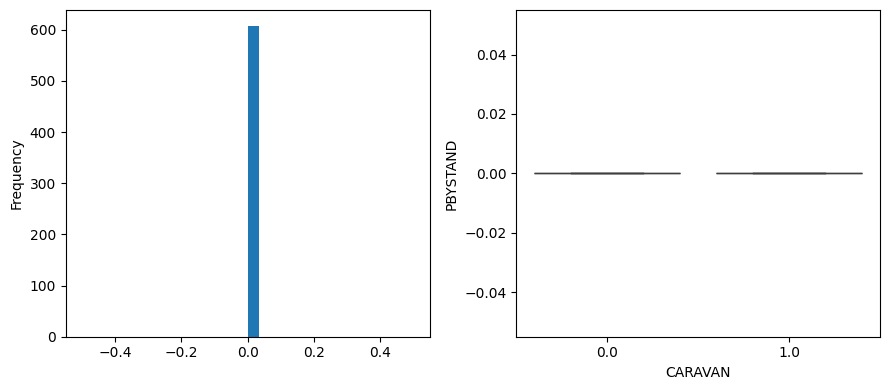

         count  mean  median  std  min  max
CARAVAN                                    
0          567   0.0     0.0  0.0  0.0  0.0
1           41   0.0     0.0  0.0  0.0  0.0 


=== AWABEDR ===
 ---> Límites Outliers AWABEDR 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AWABEDR  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          573   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        AWABEDR
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


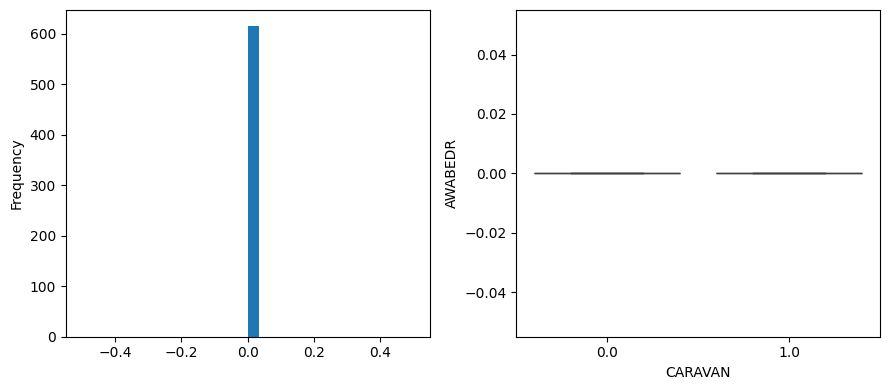

         count  mean  median  std  min  max
CARAVAN                                    
0          573   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== AWALAND ===
 ---> Límites Outliers AWALAND 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AWALAND  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        AWALAND
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


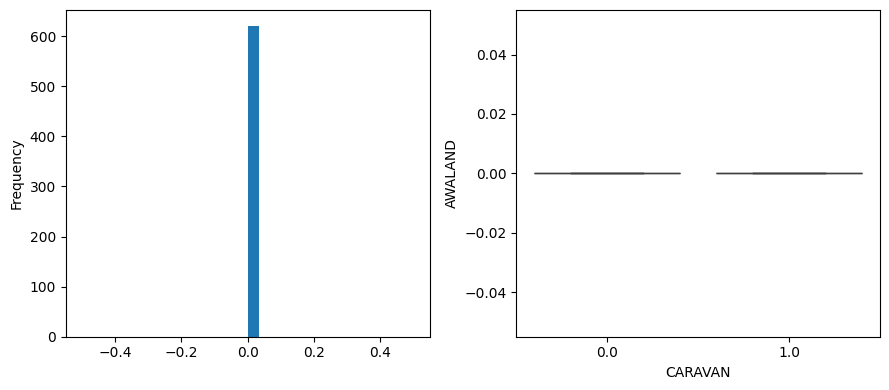

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== APERSAUT ===
 ---> Límites Outliers APERSAUT 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
APERSAUT  0.0  1.0  1.0   -1.5    2.5         NaN       846.0 

         count  mean  median   std  min  max
CARAVAN                                     
0          574  0.64     1.0  0.57  0.0  2.0
1           43  1.00     1.0  0.53  0.0  2.0 

variable        APERSAUT
long_media          True
dif_mean            0.56
dif<10%            False
considerar            SI
cambia_rango          NO
dtype: object 



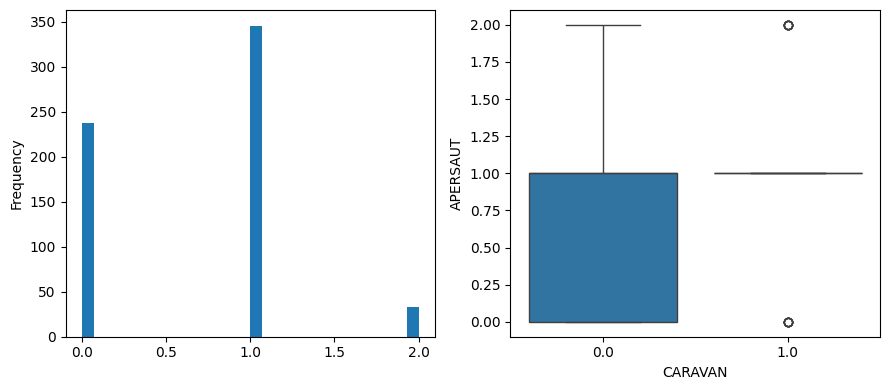

         count  mean  median   std  min  max
CARAVAN                                     
0          574  0.64     1.0  0.57  0.0  2.0
1           43  1.00     1.0  0.53  0.0  2.0 


=== ABESAUT ===
 ---> Límites Outliers ABESAUT 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
ABESAUT  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          575   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        ABESAUT
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


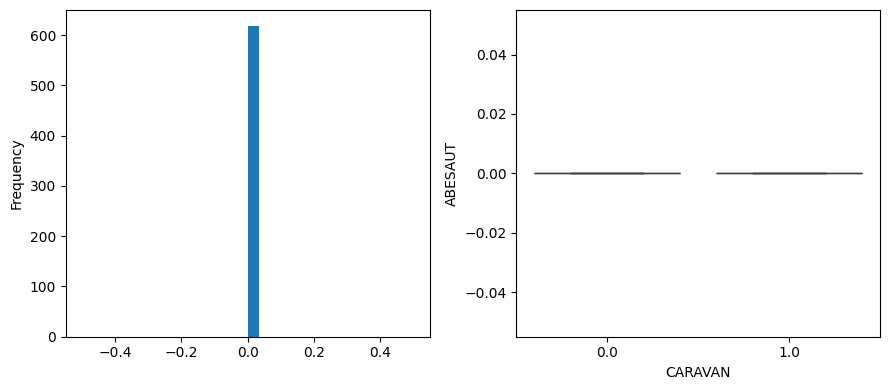

         count  mean  median  std  min  max
CARAVAN                                    
0          575   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== AMOTSCO ===
 ---> Límites Outliers AMOTSCO 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AMOTSCO  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          558   0.0     0.0  0.0  0.0  0.0
1           39   0.0     0.0  0.0  0.0  0.0 

variable        AMOTSCO
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


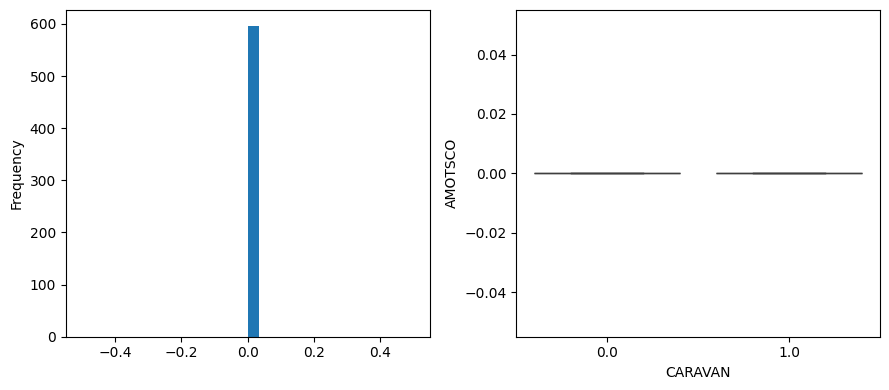

         count  mean  median  std  min  max
CARAVAN                                    
0          558   0.0     0.0  0.0  0.0  0.0
1           39   0.0     0.0  0.0  0.0  0.0 


=== AVRAAUT ===
 ---> Límites Outliers AVRAAUT 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AVRAAUT  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        AVRAAUT
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


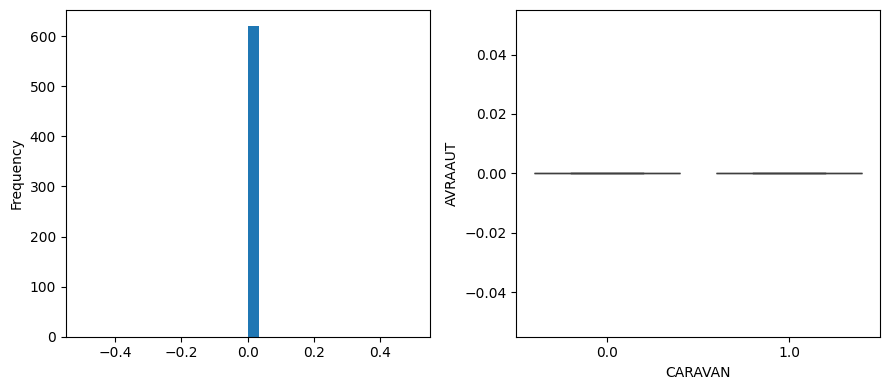

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== AAANHANG ===
 ---> Límites Outliers AAANHANG 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AAANHANG  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        AAANHANG
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


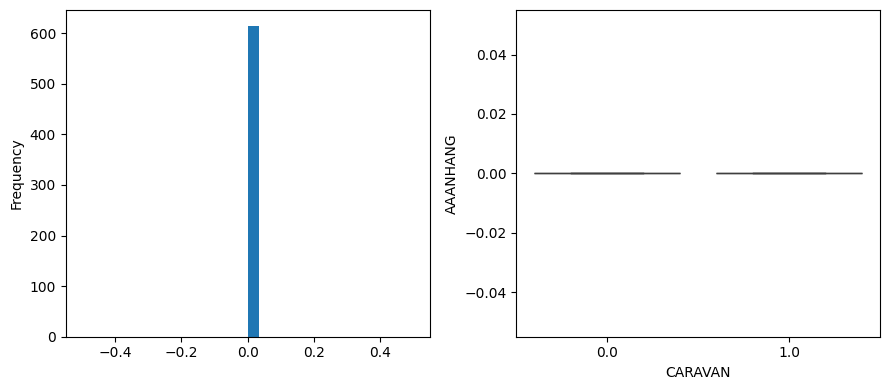

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== ATRACTOR ===
 ---> Límites Outliers ATRACTOR 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
ATRACTOR  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          564   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        ATRACTOR
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


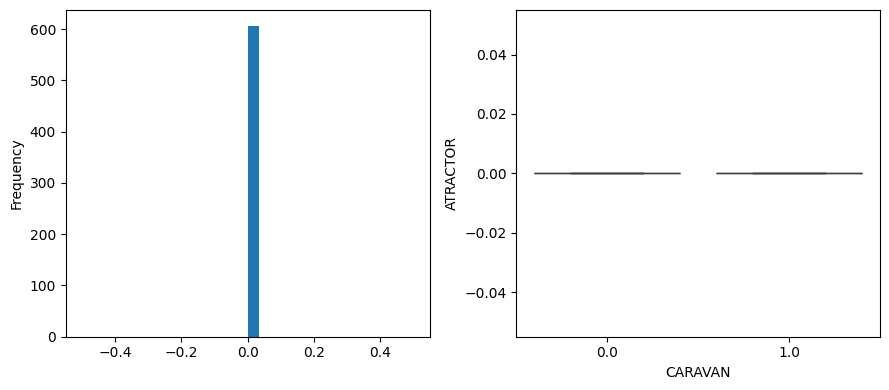

         count  mean  median  std  min  max
CARAVAN                                    
0          564   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== AWERKT ===
 ---> Límites Outliers AWERKT 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AWERKT  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        AWERKT
long_media       False
dif_mean           NaN
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


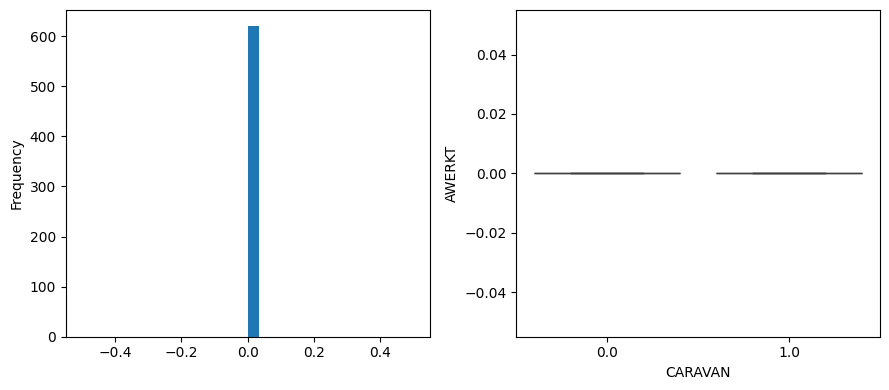

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== ABROM ===
 ---> Límites Outliers ABROM 
         Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
ABROM  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        ABROM
long_media      False
dif_mean          NaN
dif<10%         False
considerar         SI
cambia_rango       SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


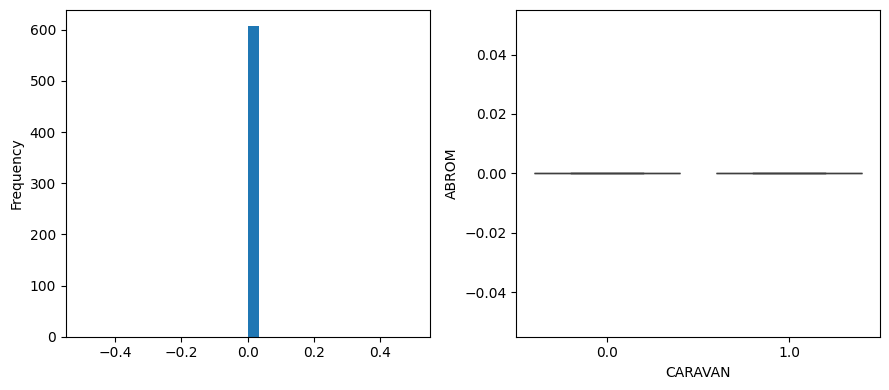

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== ALEVEN ===
 ---> Límites Outliers ALEVEN 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
ALEVEN  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          526   0.0     0.0  0.0  0.0  0.0
1           39   0.0     0.0  0.0  0.0  0.0 

variable        ALEVEN
long_media       False
dif_mean           NaN
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


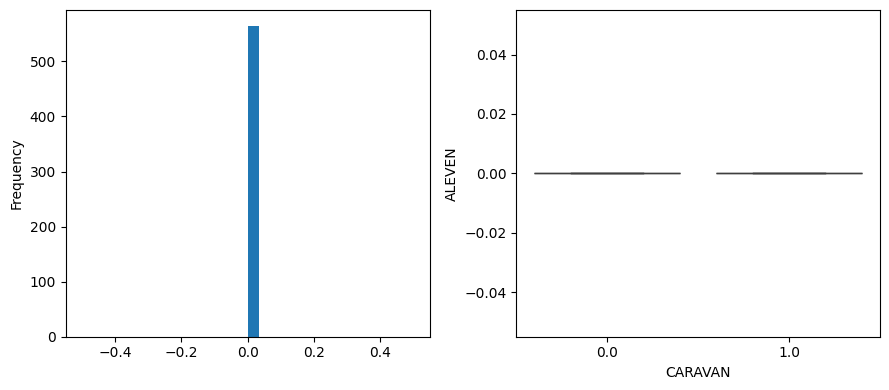

         count  mean  median  std  min  max
CARAVAN                                    
0          526   0.0     0.0  0.0  0.0  0.0
1           39   0.0     0.0  0.0  0.0  0.0 


=== APERSONG ===
 ---> Límites Outliers APERSONG 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
APERSONG  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        APERSONG
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


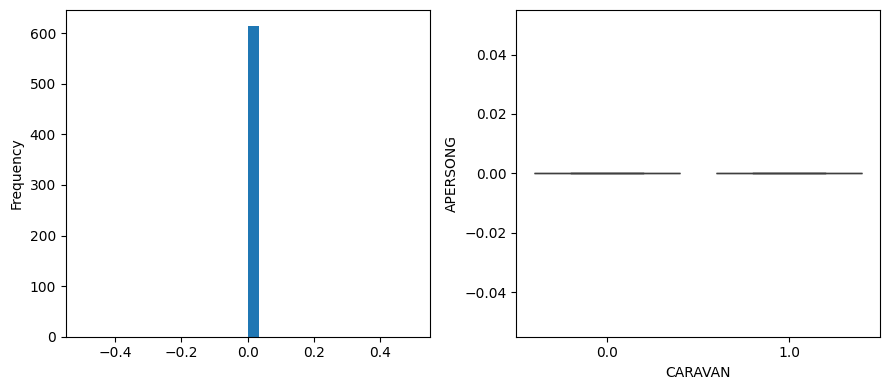

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== AGEZONG ===
 ---> Límites Outliers AGEZONG 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AGEZONG  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          573   0.0     0.0  0.0  0.0  0.0
1           42   0.0     0.0  0.0  0.0  0.0 

variable        AGEZONG
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


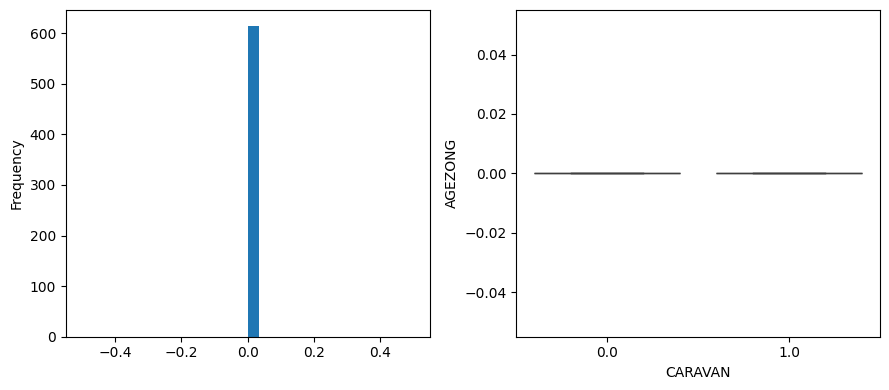

         count  mean  median  std  min  max
CARAVAN                                    
0          573   0.0     0.0  0.0  0.0  0.0
1           42   0.0     0.0  0.0  0.0  0.0 


=== AWAOREG ===
 ---> Límites Outliers AWAOREG 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AWAOREG  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        AWAOREG
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


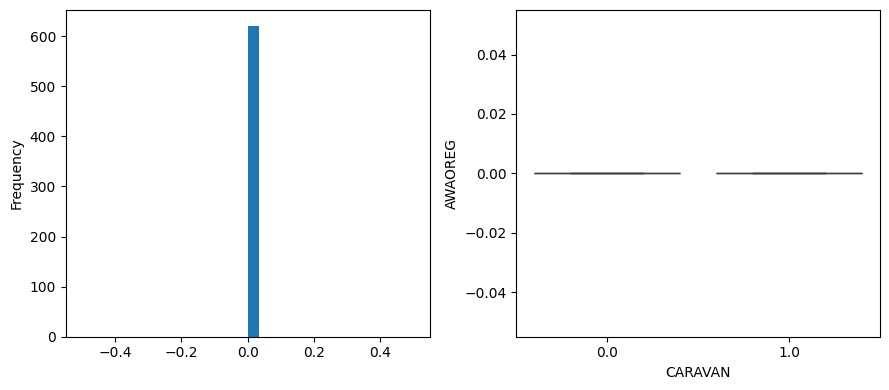

         count  mean  median  std  min  max
CARAVAN                                    
0          577   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== ABRAND ===
 ---> Límites Outliers ABRAND 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
ABRAND  1.0  1.0  0.0    1.0    1.0         0.0       598.0 

         count  mean  median  std  min  max
CARAVAN                                    
0          499   1.0     1.0  0.0  1.0  1.0
1           39   1.0     1.0  0.0  1.0  1.0 

variable        ABRAND
long_media       False
dif_mean           0.0
dif<10%           True
considerar          NO
cambia_rango        SI
dtype: object 



/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


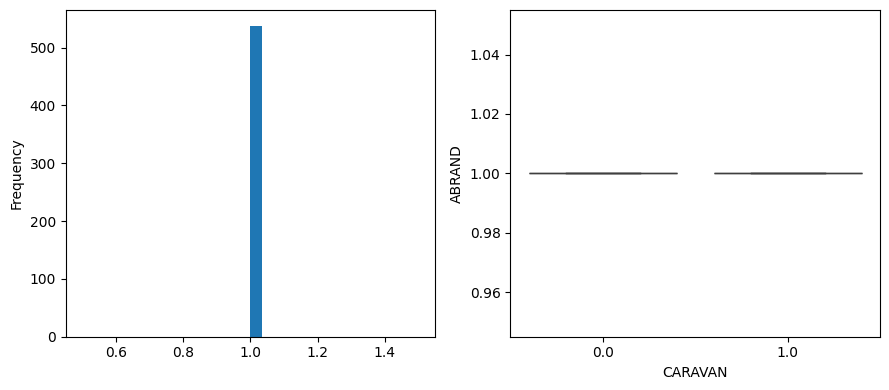

         count  mean  median  std  min  max
CARAVAN                                    
0          499   1.0     1.0  0.0  1.0  1.0
1           39   1.0     1.0  0.0  1.0  1.0 


=== AZEILPL ===
 ---> Límites Outliers AZEILPL 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AZEILPL  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          576   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        AZEILPL
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


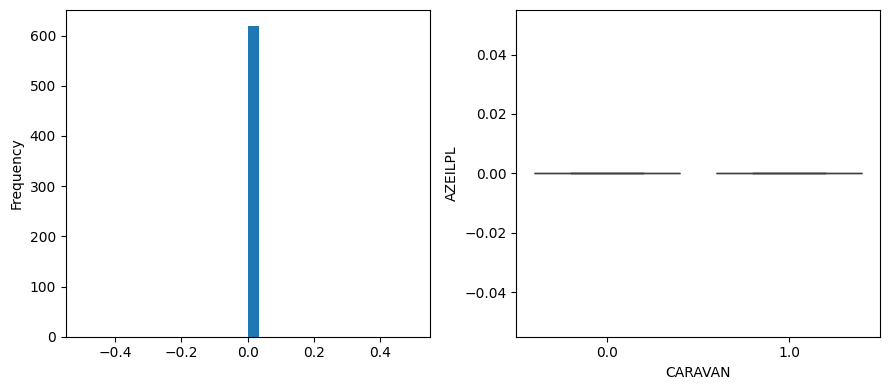

         count  mean  median  std  min  max
CARAVAN                                    
0          576   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== APLEZIER ===
 ---> Límites Outliers APLEZIER 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
APLEZIER  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          576   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 

variable        APLEZIER
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


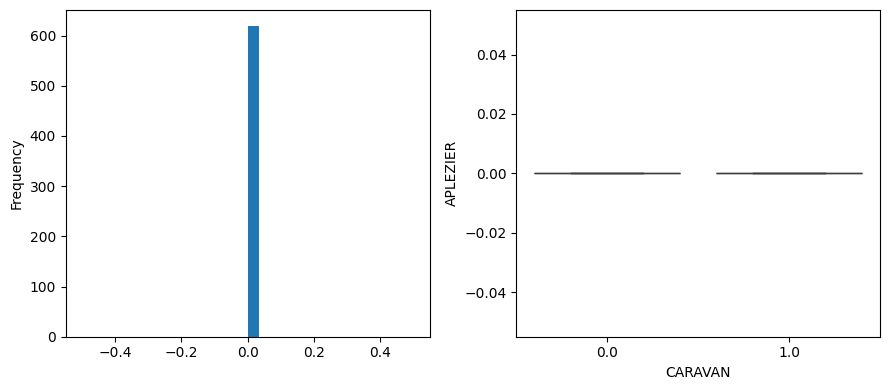

         count  mean  median  std  min  max
CARAVAN                                    
0          576   0.0     0.0  0.0  0.0  0.0
1           44   0.0     0.0  0.0  0.0  0.0 


=== AFIETS ===
 ---> Límites Outliers AFIETS 
          Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AFIETS  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           39   0.0     0.0  0.0  0.0  0.0 

variable        AFIETS
long_media       False
dif_mean           NaN
dif<10%          False
considerar          SI
cambia_rango        SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


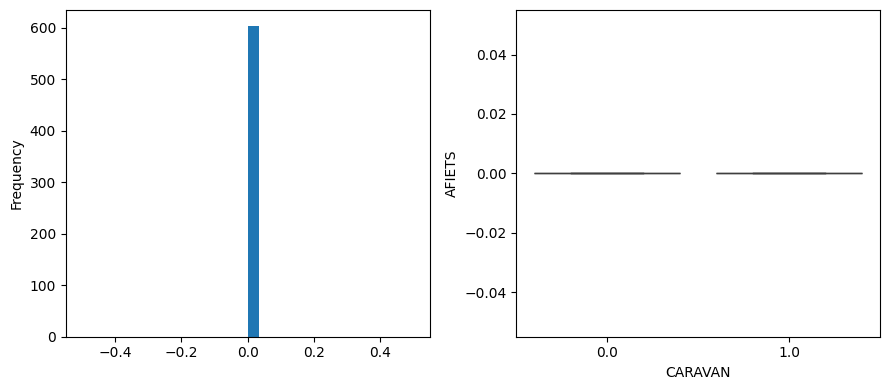

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           39   0.0     0.0  0.0  0.0  0.0 


=== AINBOED ===
 ---> Límites Outliers AINBOED 
           Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
AINBOED  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 

variable        AINBOED
long_media        False
dif_mean            NaN
dif<10%           False
considerar           SI
cambia_rango         SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


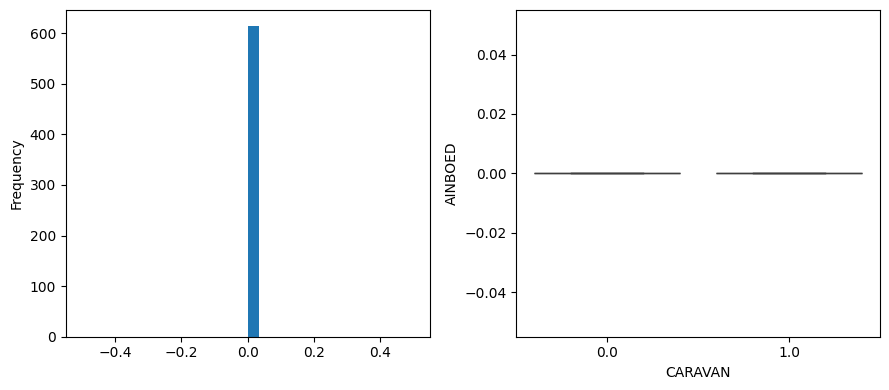

         count  mean  median  std  min  max
CARAVAN                                    
0          572   0.0     0.0  0.0  0.0  0.0
1           43   0.0     0.0  0.0  0.0  0.0 


=== ABYSTAND ===
 ---> Límites Outliers ABYSTAND 
            Q1   Q3  IQR  lower  upper  extrem_min  extrem_max
ABYSTAND  0.0  0.0  0.0    0.0    0.0         NaN         NaN 

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           41   0.0     0.0  0.0  0.0  0.0 

variable        ABYSTAND
long_media         False
dif_mean             NaN
dif<10%            False
considerar            SI
cambia_rango          SI
dtype: object 



/tmp/ipython-input-3336318166.py:45: RuntimeWarning: invalid value encountered in scalar divide
  long_mean = round( abs(tabla_ct.loc[0, 'mean']- tabla_ct.loc[1, 'mean'])/tabla_ct.loc[0, 'mean'],2)
/tmp/ipython-input-3336318166.py:49: RuntimeWarning: invalid value encountered in scalar divide
  dif_media = round( abs(tabla_ct.loc[0, 'max']- tabla_ct.loc[0, 'min'])/abs(tabla_ct.loc[1, 'max']- tabla_ct.loc[1, 'min']),2)


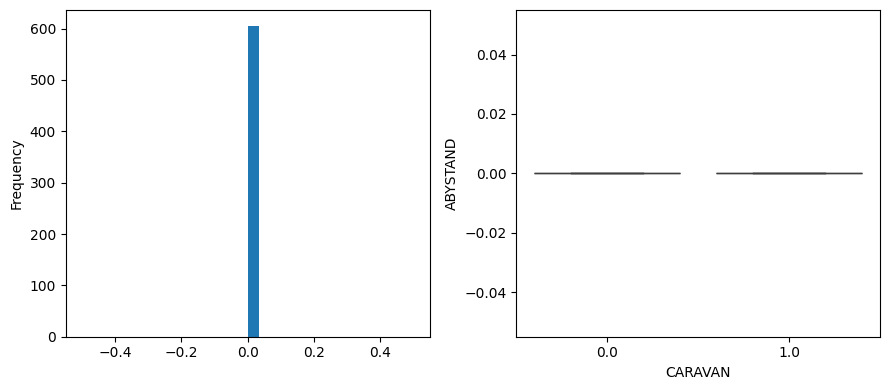

         count  mean  median  std  min  max
CARAVAN                                    
0          565   0.0     0.0  0.0  0.0  0.0
1           41   0.0     0.0  0.0  0.0  0.0 

           0   1   2
0     MGODPR  NO  NO
1     MGODOV  NO  SI
2     MGODGE  SI  SI
3     MRELGE  NO  SI
4     MRELSA  NO  SI
..       ...  ..  ..
69   AZEILPL  SI  SI
70  APLEZIER  SI  SI
71    AFIETS  SI  SI
72   AINBOED  SI  SI
73  ABYSTAND  SI  SI

[74 rows x 3 columns]


In [311]:
# Crear un nuevo DataFrame eliminando las columnas en la lista 'EXCLUDE_COLS' del DataFrame limpio original
df_depuracion = df_clean.drop(columns=EXCLUDE_COLS, errors="ignore")

# Inicializar una lista vacía para almacenar resultados
resultados = []

# Iterar a través de las columnas del DataFrame 'df_depuracion'
for col in df_depuracion.columns:
    # Saltar la variable objetivo 'CARAVAN'
    if col == "CARAVAN":  # evitar usar el objetivo como y_var
        continue
    # Imprimir la variable actual que se está analizando
    print(f"\n=== {col} ===")
    # Llamar a la función 'info_variable' para obtener información y gráficas para la variable
    tab_compara, para_modelo = info_variable("CARAVAN", col, df_clean, 1, 2)
    # Imprimir la tabla de comparación
    print(tab_compara, "\n")
    # Añadir la serie 'para_modelo' a la lista de resultados
    resultados.append(para_modelo)

# Crear un DataFrame a partir de la lista de resultados
df_diagnostico = pd.DataFrame(resultados)
# Imprimir el DataFrame de diagnóstico
print(df_diagnostico)

   # num_cols = df_clean.select_dtypes(include="number").columns.drop("CARAVAN", errors="ignore")

In [312]:
# Filtrar el DataFrame 'df_diagnostico' basándose en condiciones para la eliminación de outliers
# Mantener filas donde la segunda columna ('considerar') es 'NO' O la tercera columna ('cambia_rango') es 'NO'
df_filtrado = df_diagnostico[
    (df_diagnostico.iloc[:, 1] == "NO") |
    (df_diagnostico.iloc[:, 2] == "NO")]
# Imprimir el DataFrame filtrado
print(df_filtrado)

# Obtener la lista de variables de la primera columna del DataFrame filtrado
var_NO_consider = df_filtrado.iloc[:, 0].tolist()

# Definir la lista final de columnas a excluir
# Esto incluye variables donde los outliers no se eliminaron inicialmente, 'MBERBOER', y variables no consideradas basándose en el impacto de outliers o el cambio de rango
EXCLUDE_FINAL = v_lista_mantener + ['MBERBOER'] + var_NO_consider

           0   1   2
0     MGODPR  NO  NO
1     MGODOV  NO  SI
3     MRELGE  NO  SI
4     MRELSA  NO  SI
7   MFGEKIND  SI  NO
8   MFWEKIND  NO  SI
9   MOPLHOOG  SI  NO
10  MOPLMIDD  SI  NO
11  MOPLLAAG  SI  NO
13  MBERZELF  SI  NO
14  MBERMIDD  SI  NO
18     MSKB2  NO  SI
19      MSKC  NO  NO
21    MHHUUR  SI  NO
22    MHKOOP  SI  NO
23     MAUT1  NO  SI
26   MZFONDS  NO  SI
29  MINK3045  NO  SI
30  MINK4575  SI  NO
31  MINK7512  SI  NO
33   MINKGEM  SI  NO
56  APERSAUT  SI  NO
68    ABRAND  NO  SI


In [313]:
# Crear un nuevo DataFrame eliminando las columnas en la lista 'EXCLUDE_FINAL' del DataFrame limpio original
df_mod = df_clean.drop(columns=EXCLUDE_FINAL, errors="ignore")
# Mostrar las primeras filas del DataFrame modificado
df_mod.head()

,MOSTYPE,MOSHOOFD,MGODGE,MRELOV,MFALLEEN,MBERHOOG,MBERARBG,MBERARBO,MSKB1,MSKD,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,37.0,8.0,4.0,4.0,4.0,0.0,0.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,3.0,4.0,2.0,2.0,4.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.0,8.0,2.0,0.0,0.0,2.0,5.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.0,5.0,4.0,2.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.0,8.0,3.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,827.0,0.0,0.0,0.0,0.0


In [314]:
# Calcular la matriz de correlación para las columnas numéricas en el DataFrame modificado
corr = df_mod.corr(numeric_only=True)
# Definir un umbral de correlación
umbral = 0.3

# Crear una máscara para seleccionar el triángulo superior de la matriz de correlación
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
# Aplicar la máscara a la matriz de correlación
corr_upper = corr.where(mask)

# "Desapilar" el triángulo superior de la matriz de correlación, renombrar la columna a 'r', filtrar por el valor absoluto de la correlación mayor o igual al umbral, y ordenar por correlación absoluta en orden descendente
pares_fuertes = (
    corr_upper.stack()
              .rename("r")
              .pipe(lambda s: s[abs(s) >= umbral])
              .sort_values(key=abs, ascending=False)
)

# Imprimir los pares de variables con una fuerte correlación absoluta
print("Pares de variables con |r| ≥ 0.7:")
print(pares_fuertes)

Pares de variables con |r| ≥ 0.7:
MOSTYPE  MOSHOOFD    0.992101
MAUT0    AWAOREG     0.554319
PWALAND  PINBOED     0.456106
PBESAUT  AGEZONG     0.378528
PWALAND  PFIETS      0.321411
Name: r, dtype: float64


In [315]:
# Estos son comentarios que explican las variables que fueron identificadas con alta correlación
# y la decisión de mantenerlas o eliminarlas basándose en su significado.

# Vamos a mantener MOSTTYPE que contiene los subtipos de cliente
# MAUT0,   indica quienes no tienen auto
# PINBOED, indica pólizas de seguro de propiedad
# PBESAUT, pólizas de seguro de furgonetas de reparto,
# AGEZONG, número de pólizas de seguro de accidentes familiares
# PFIETS   pólizas de seguro de bicicleta.

In [316]:
# Vamos a eliminar variables correlacionadas

# Definir la lista de variables a eliminar basándose en el análisis de correlación
delete_var = ['MOSHOOFD','AWAOREG','PWALAND','PBESAUT']
# Actualizar la lista final de columnas a excluir añadiendo las variables a eliminar
EXCLUDE_FINAL = v_lista_mantener + ['MBERBOER'] + var_NO_consider + delete_var
# Crear un nuevo DataFrame eliminando las columnas en la lista 'EXCLUDE_FINAL' actualizada
df_mod_p2 = df_mod.drop(columns=EXCLUDE_FINAL, errors="ignore")

In [317]:
# Imprimir la lista final de columnas que fueron excluidas del DataFrame
print(EXCLUDE_FINAL)

['MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MGODRK', 'MSKA', 'PWAPART', 'AWAPART', 'MBERBOER', 'MGODPR', 'MGODOV', 'MRELGE', 'MRELSA', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERZELF', 'MBERMIDD', 'MSKB2', 'MSKC', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MZFONDS', 'MINK3045', 'MINK4575', 'MINK7512', 'MINKGEM', 'APERSAUT', 'ABRAND', 'MOSHOOFD', 'AWAOREG', 'PWALAND', 'PBESAUT']


CARAVAN     1.000000
PPERSAUT    0.123195
PWERKT      0.119447
AAANHANG    0.106343
APERSONG    0.103658
Name: CARAVAN, dtype: float64


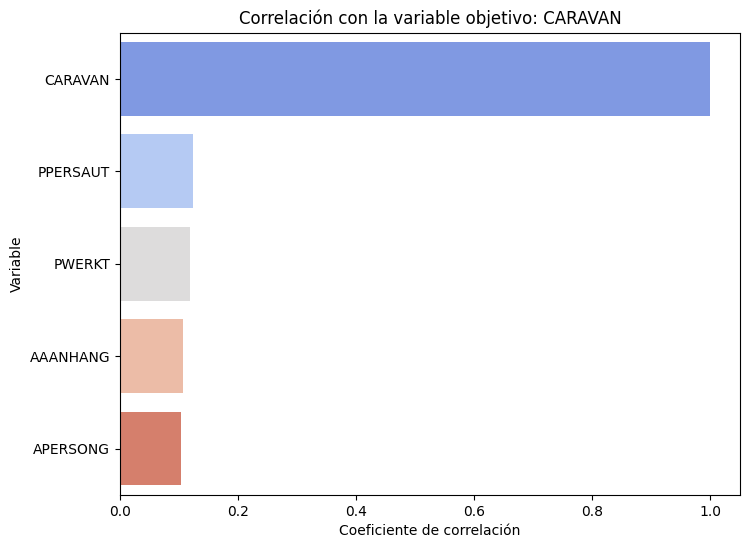

In [318]:
# Definir la variable objetivo
target = "CARAVAN"

# Calcular la correlación de todas las columnas numéricas con la variable objetivo y ordenar en orden descendente
corr_target = df_mod_p2.corr(numeric_only=True)[target].sort_values(ascending=False)
# Filtrar correlaciones para mantener solo aquellas con un valor absoluto mayor que 0.1
corr_filtrada = corr_target[(abs(corr_target) > 0.1)]
# Imprimir las correlaciones filtradas
print(corr_filtrada)

# Crear un gráfico de barras para visualizar la correlación con la variable objetivo
# Crear la figura para el gráfico
plt.figure(figsize=(8, 6))
# Se crea gráfico de barras con seaborn
sns.barplot(x=corr_filtrada.values, y=corr_filtrada.index, palette="coolwarm", hue=corr_filtrada.index)
# Establecer el título y las etiquetas de la gráfica
# Etiqueta del título
plt.title(f"Correlación con la variable objetivo: {target}")
# Etiqueta del eje de las x
plt.xlabel("Coeficiente de correlación")
# Etiqueta dle eje de las y
plt.ylabel("Variable")
# Finalmente la gráfica
plt.show()

In [319]:
# Seleccionar columnas numéricas del DataFrame y eliminar filas con valores faltantes
X = df_mod_p2.select_dtypes(include=['number']).dropna()

#X = df_mod_p2.drop('CARAVAN', axis=1)
#y = df_mod_p2['CARAVAN']

# Inicializar el StandardScaler
scaler = StandardScaler()
# Estandarizar los datos (escalar características para tener media cero y varianza unitaria) - importante para PCA
X_scaled = scaler.fit_transform(X)

In [320]:
# Importar el módulo PCA
from sklearn.decomposition import PCA
# Inicializar PCA con un número especificado de componentes
pca = PCA(n_components=15)
# Ajustar PCA a los datos escalados y transformar los datos
X_pca = pca.fit_transform(X_scaled)

In [321]:
# Calcular el porcentaje de varianza explicada por cada componente principal, redondeado a 2 decimales
var_explicada = np.round(pca.explained_variance_ratio_ * 100, 2)
# Imprimir la varianza explicada para cada componente
print("Varianza explicada por componente:")
print(var_explicada)

Varianza explicada por componente:
[2.72 2.64 2.49 2.48 2.4  2.25 2.21 2.09 2.07 2.04 2.01 2.01 2.   1.99
 1.99]


In [322]:
# Crear un nuevo DataFrame a partir de los datos transformados por PCA
# Nombrar las columnas PC1, PC2, ..., PCn
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
# Mostrar las primeras filas del DataFrame PCA
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.138209,0.768419,0.121404,-0.038663,0.084078,-0.066348,-0.188559,-0.011034,-0.077530,0.021636,-0.070799,0.007143,-0.052464,-0.005541,-0.014472
1,-0.174867,-0.660706,-0.356489,-0.158205,-0.469549,0.012935,-0.009794,-0.074132,-0.047530,-0.001208,-0.015592,0.023796,-0.000086,-0.040595,0.013484
2,0.092710,3.311173,1.361149,-0.110798,-1.443779,9.643695,7.503935,0.550254,1.298367,0.977703,-1.448571,1.751434,-0.269403,0.045278,0.547902
3,-0.143712,0.188178,-1.125294,-1.696093,1.594208,0.092195,-0.049118,0.056505,0.192839,0.820310,-0.023698,-0.402589,0.666615,-0.372790,-2.024532
4,0.387153,2.378836,0.177364,-0.317846,-0.120114,-0.636705,-1.535614,-0.065457,-1.117952,3.013277,-1.251423,-0.192947,-3.238746,0.051989,0.038972


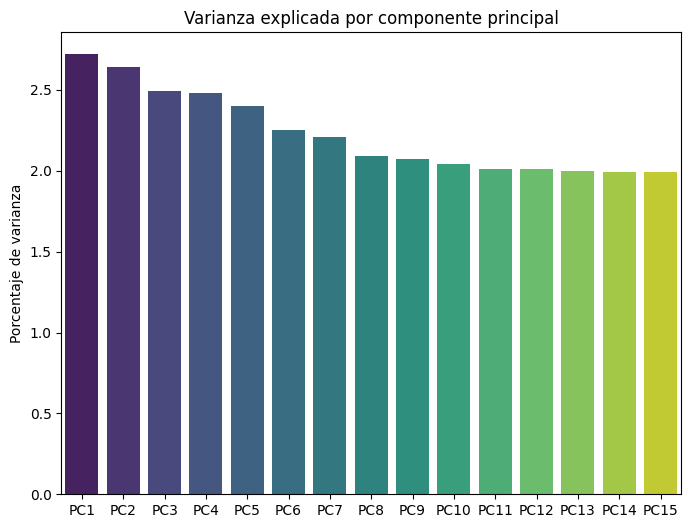

In [323]:
# Crear un gráfico de barras para visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(8,6))
sns.barplot(x=[f'PC{i+1}' for i in range(pca.n_components_)], y=var_explicada, palette="viridis", hue=[f'PC{i+1}' for i in range(pca.n_components_)], legend=False)
# Establecer el título y las etiquetas de la gráfica
# Etiqueta del título
plt.title("Varianza explicada por componente principal")
# Etiqueta del eje de las y
plt.ylabel("Porcentaje de varianza")
# Mostrar la gráfica
plt.show()

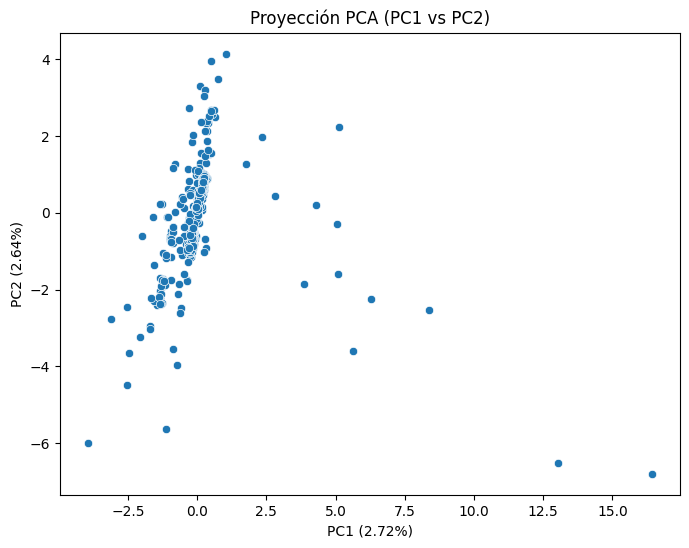

In [324]:
# Crear un gráfico de dispersión de los dos primeros componentes principales
plt.figure(figsize=(8,6))
# Se crea un gráfico de dispersión con seaborn
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
# Establecer el título y las etiquetas de la gráfica, incluyendo el porcentaje de varianza explicado por cada componente
# Etiqueta del título
plt.title("Proyección PCA (PC1 vs PC2)")
# Etiqueta del eje de las x
plt.xlabel(f"PC1 ({var_explicada[0]}%)")
# Etiqueta dle eje de las y
plt.ylabel(f"PC2 ({var_explicada[1]}%)")
# Mostrar la gráfica
plt.show()

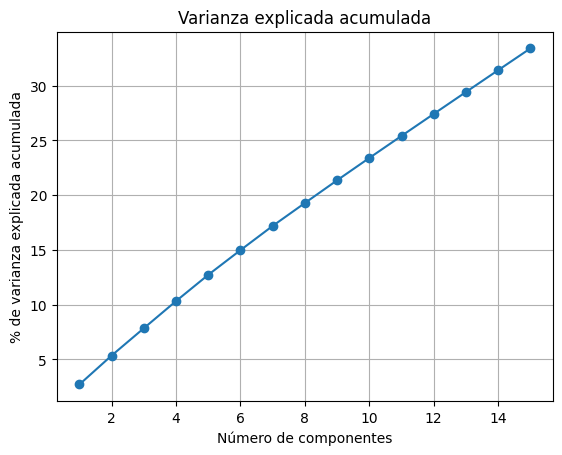

In [325]:
# Calcular la razón de varianza explicada acumulada y convertir a porcentaje
var_acum = np.cumsum(pca.explained_variance_ratio_) * 100
# Graficar la varianza explicada acumulada frente al número de componentes
plt.plot(range(1, len(var_acum)+1), var_acum, marker='o')
# Establecer el título y las etiquetas de la gráfica
# Etiqueta del título
plt.title("Varianza explicada acumulada")
# Etiqueta del eje de las x
plt.xlabel("Número de componentes")
# Etiqueta del eje de las y
plt.ylabel("% de varianza explicada acumulada")
# Añadir una cuadrícula a la gráfica
plt.grid()
# Mostrar la gráfica
plt.show()

In [327]:
# Asignar los datos transformados por PCA a las características de entrada X
datos_x = df_pca

# El código original comentado a continuación usaría el DataFrame antes de PCA
#X = df_mod_p2.drop('CARAVAN', axis=1)
#y = df_mod_p2['CARAVAN']

# Asignar los datos transformados por PCA a X
X = datos_x
# Asignar la variable objetivo 'CARAVAN' a y
y = df_mod_p2['CARAVAN']

# Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.2 significa que el 20% de los datos se utilizará para la prueba
# random_state=42 asegura la reproducibilidad de la división
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
# Inicializar un modelo de Regresión Logística
# max_iter=1000 establece el número máximo de iteraciones para el solucionador
# tol=0.0001 establece la tolerancia para el criterio de parada
model = LogisticRegression(max_iter=1000, tol=0.0001)
# Entrenar el modelo de Regresión Logística utilizando los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [329]:
# Realizar predicciones sobre los datos de prueba utilizando el modelo entrenado
y_pred = model.predict(X_test)

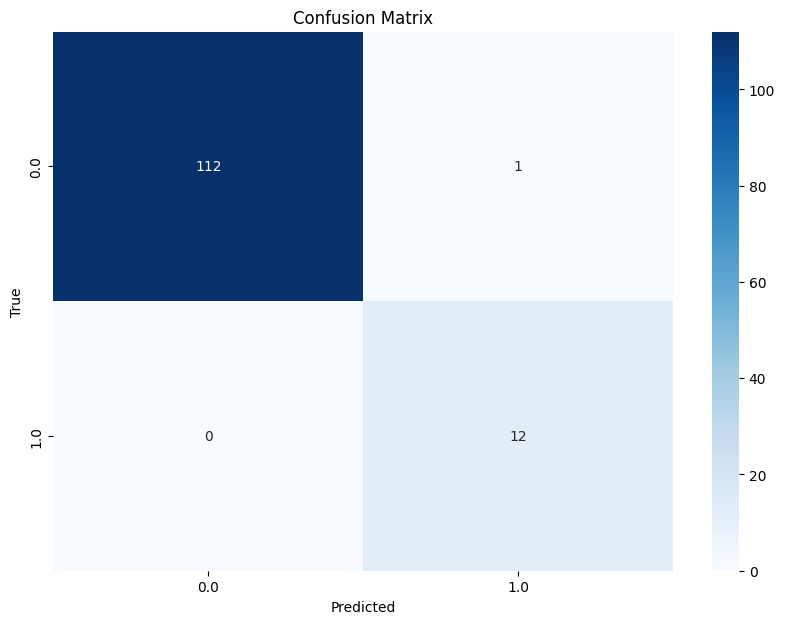

In [330]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Crear un mapa de calor para visualizar la matriz de confusión
# Se crea la figura
plt.figure(figsize=(10,7))
# Se crea el mapa de calor utilizando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
# Establecer las etiquetas y el título de la gráfica
# Etiqueta del eje de las x
plt.xlabel('Predicted')
# Etiqueta dle eje de las y
plt.ylabel('True')
# Etiqueta del título
plt.title('Confusion Matrix')
# Mostrar la gráfica
plt.show()

In [331]:
# Generar un informe de clasificación como un diccionario
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir el diccionario del informe de clasificación a un DataFrame
report_df = pd.DataFrame(report).transpose()

# Imprimir el DataFrame del informe de clasificación
print(report_df)

              precision    recall  f1-score  support
0.0            1.000000  0.991150  0.995556  113.000
1.0            0.923077  1.000000  0.960000   12.000
accuracy       0.992000  0.992000  0.992000    0.992
macro avg      0.961538  0.995575  0.977778  125.000
weighted avg   0.992615  0.992000  0.992142  125.000


In [332]:
# Realizar validación cruzada con 5 folds para evaluar el rendimiento del modelo
scores = cross_val_score(model, X, y, cv=5)
# Imprimir la puntuación de precisión promedio de la validación cruzada
print("Precisión promedio con CV:", np.mean(scores))

Precisión promedio con CV: 0.9807612903225806


In [333]:
# Realizar predicciones sobre los datos de entrenamiento
y_pred_train = model.predict(X_train)
# Realizar predicciones sobre los datos de prueba
y_pred_test = model.predict(X_test)

# Calcular e imprimir la puntuación de precisión para los datos de entrenamiento
print("Entrenamiento:", accuracy_score(y_train, y_pred_train))
# Calcular e imprimir la puntuación de precisión para los datos de prueba
print("Prueba:", accuracy_score(y_test, y_pred_test))

Entrenamiento: 0.9839679358717435
Prueba: 0.992


## Comparación con otros modelos

Implementar otros modelos para comparar rendimiento y realizar la búsqueda de los mejores hiperparámetros para cada modelo utilizando técnicas como Grid Search y validación cruzada en los datos de entrenamiento.

In [352]:
# Definimos hiperparámetros para el Grid Search

# Define hiperparámetros para la Regresión Logística
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Define hiperparámetros para Randome Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define hiperparámetros para SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Define hiperparámetros para K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [349]:
# Primero optimizamos los parámetros para Regresión Logística

# Inicializamos GridSearchCV para Regresión Logística
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
# Hacemos el Fit GridSearchCV para los datos de entrenamiento
grid_search_lr.fit(X_train, y_train)
# Se imprimen los mejores parámetros encontrados
print("Mejores hiperparámetros para Regresión Logística:", grid_search_lr.best_params_)
# Se imprime la mejor puntuación para la validación cruzada de Regresión lineal
print("Mejor puntuación de validación cruzada para Regresión Logística:", grid_search_lr.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Mejores hiperparámetros para Regresión Logística: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor puntuación de validación cruzada para Regresión Logística: 0.981979797979798


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Entrenamiento de Modelos con Mejores Hiperparámetros


## Evaluación de Modelos



### Subtask:
Comparar los resultados de evaluación de los cuatro modelos y determinar cuál ofrece el mejor rendimiento, proporcionando un veredicto basado en las métricas clave.

In [356]:
# Inicializa GridSearchCV para Random Forest Classifier
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
# Ajusta GridSearchCV a los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)
# Imprime los mejores parámetros encontrados para Random Forest Classifier
print("Mejores hiperparámetros para Random Forest:", grid_search_rf.best_params_)
# Imprime la mejor puntuación de validación cruzada para Random Forest Classifier
print("Mejor puntuación de validación cruzada para Random Forest:", grid_search_rf.best_score_)

Mejores hiperparámetros para Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Mejor puntuación de validación cruzada para Random Forest: 0.979979797979798


In [357]:
# Inicializa GridSearchCV para Support Vector Machine
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy')
# Ajusta GridSearchCV a los datos de entrenamiento
grid_search_svc.fit(X_train, y_train)
# Imprime los mejores parámetros encontrados para Support Vector Machine
print("Mejores hiperparámetros para Support Vector Machine:", grid_search_svc.best_params_)
# Imprime la mejor puntuación de validación cruzada para Support Vector Machine
print("Mejor puntuación de validación cruzada para Support Vector Machine:", grid_search_svc.best_score_)

Mejores hiperparámetros para Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor puntuación de validación cruzada para Support Vector Machine: 0.9800000000000001


In [358]:
# Initialize GridSearchCV for K-Nearest Neighbors
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
# Fit GridSearchCV to the training data
grid_search_knn.fit(X_train, y_train)
# Print the best parameters found for K-Nearest Neighbors
print("Mejores hiperparámetros para K-Nearest Neighbors:", grid_search_knn.best_params_)
# Print the best cross-validation score for K-Nearest Neighbors:", grid_search_knn.best_score_)
print("Mejor puntuación de validación cruzada para K-Nearest Neighbors:", grid_search_knn.best_score_)

Mejores hiperparámetros para K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Mejor puntuación de validación cruzada para K-Nearest Neighbors: 0.982


In [359]:
# Entrenar Regresión Logística con los mejores hiperparámetros
best_lr_model = LogisticRegression(**grid_search_lr.best_params_)
best_lr_model.fit(X_train, y_train)

LogisticRegression(C=0.001, solver='liblinear')

In [360]:
# Entrenar Random Forest con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(**grid_search_rf.best_params_)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [361]:
# Entrenar Support Vector Machine con los mejores hiperparámetros
best_svc_model = SVC(**grid_search_svc.best_params_)
best_svc_model.fit(X_train, y_train)

SVC(C=1)

In [362]:
# Entrenar K-Nearest Neighbors con los mejores hiperparámetros
best_knn_model = KNeighborsClassifier(**grid_search_knn.best_params_)
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

## Entrenamiento de Modelos con Mejores Hiperparámetros

### Subtask:
Entrenar cada uno de los cuatro modelos utilizando los hiperparámetros óptimos encontrados en el paso anterior.

## Evaluación del desempeño con otros modelos

In [367]:
# Evaluar Regresión Logística
y_pred_lr = best_lr_model.predict(X_test)
print("--- Evaluación de Regresión Logística ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

--- Evaluación de Regresión Logística ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       113
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Confusion Matrix:
 [[113   0]
 [  0  12]]


In [369]:
# Evaluar Random Forest
y_pred_rf = best_rf_model.predict(X_test)
print("--- Evaluación de Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

--- Evaluación de Random Forest ---
Accuracy: 0.984
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       113
         1.0       1.00      0.83      0.91        12

    accuracy                           0.98       125
   macro avg       0.99      0.92      0.95       125
weighted avg       0.98      0.98      0.98       125

Confusion Matrix:
 [[113   0]
 [  2  10]]


In [370]:
# Evaluar Support Vector Machine
y_pred_svc = best_svc_model.predict(X_test)
print("--- Evaluación de Support Vector Machine ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

--- Evaluación de Support Vector Machine ---
Accuracy: 0.984
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       113
         1.0       1.00      0.83      0.91        12

    accuracy                           0.98       125
   macro avg       0.99      0.92      0.95       125
weighted avg       0.98      0.98      0.98       125

Confusion Matrix:
 [[113   0]
 [  2  10]]


In [371]:
# Evaluar K-Nearest Neighbors
y_pred_knn = best_knn_model.predict(X_test)
print("--- Evaluación de K-Nearest Neighbors ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

--- Evaluación de K-Nearest Neighbors ---
Accuracy: 0.992
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       113
         1.0       1.00      0.92      0.96        12

    accuracy                           0.99       125
   macro avg       1.00      0.96      0.98       125
weighted avg       0.99      0.99      0.99       125

Confusion Matrix:
 [[113   0]
 [  1  11]]


## Selección de mejor modelo de acuerdo a los resultados del entrenamiento con hiperparámetros

## Comparación de Resultados y Veredicto basándonos en las métricas de evaluación en el conjunto de prueba:

*   **Regresión Logística:**
    *   Accuracy: 1.0
    *   Precision (clase 1): 1.00
    *   Recall (clase 1): 1.00
    *   F1-score (clase 1): 1.00
    *   Matriz de Confusión:
    <table><tr><td>113</td><td>0</td></tr>
           <tr><td>0</td><td>12</td></tr></table>
_(Predice correctamente todos los casos)_

*   **Random Forest:**
    *   Accuracy: 0.992
    *   Precision (clase 1): 1.00
    *   Recall (clase 1): 0.92
    *   F1-score (clase 1): 0.96
    *   Matriz de Confusión:     
    <table><tr><td>113</td><td>0</td></tr>
           <tr><td>1</td><td>11</td></tr></table>
_(Falla en predecir 1 caso de la clase 1)_

*   **Support Vector Machine:**
    *   Accuracy: 0.984
    *   Precision (clase 1): 1.00
    *   Recall (clase 1): 0.83
    *   F1-score (clase 1): 0.91
    *   Matriz de Confusión:     
    <table><tr><td>113</td><td>0</td></tr>
    <tr><td>2</td><td>10</td></tr></table>
_(Falla en predecir 2 casos de la clase 1)_

*   **K-Nearest Neighbors:**
    *   Accuracy: 0.992
    *   Precision (clase 1): 1.00
    *   Recall (clase 1): 0.92
    *   F1-score (clase 1): 0.96
    *   Matriz de Confusión:     
    <table><tr><td>113</td><td>0</td></tr>
           <tr><td>1</td><td>11</td></tr></table>
_(Falla en predecir 1 caso de la clase 1)_

**Veredicto:**

Basándonos en las métricas de rendimiento en el conjunto de prueba, el modelo de **Regresión Logística** parece ser el mejor modelo, ya que logró una precisión (Accuracy), precisión (Precision), recall y F1-score perfectos para ambas clases en el conjunto de prueba, como se evidencia en su matriz de confusión.

Aunque Random Forest y K-Nearest Neighbors también tuvieron un rendimiento muy alto (0.992 de Accuracy), la Regresión Logística fue la única que predijo correctamente todos los casos en el conjunto de prueba. Support Vector Machine tuvo el rendimiento ligeramente más bajo de los cuatro modelos.

Es importante tener en cuenta que estos resultados se basan en un conjunto de prueba específico y el rendimiento puede variar con diferentes conjuntos de datos. Sin embargo, para este problema y conjunto de datos, la Regresión Logística optimizada con los hiperparámetros encontrados demostró ser el modelo más efectivo.

**Conclusiones:**

Hemos implementado y comparado cuatro modelos de clasificación, optimizando sus hiperparámetros mediante Grid Search y validación cruzada. La Regresión Logística, con sus hiperparámetros óptimos, demostró ser el modelo con mejor rendimiento en el conjunto de prueba, debido a que la **Regresión Logística** tuvo el mejor rendimiento.